In [2]:
!pip3 install tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.2/213.2 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 8.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30681 sha256=27f5d81f44865564e796f4a601f3d9fdd7de6feac3e0e2bdf60a3ae7f74d5bc4
  Stored in directory: /Users/mnemosynthe/Library/Caches/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4832 sha256=ea5571e477d56d09bf696d3d1165ac1f1eb46440f8674af460ce1bf4291ee433
  Stored in directory: /Users/mnemosynthe/Library/Caches/pip/wheels/b6/0d/90/0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
  Created wheel for wrapt: filename=wrapt-1.12.1-cp39-cp39-macosx_10_9_x86_64.whl size=30811 sha256=1a8541aa1af5489c1d58111293ffc648072237c2429f75e7d6c4069fef74f43d
  Stored in directory: /Users/mnemosynthe/Library/Caches/pip/wheels/98/23/68/efe259aaca055e93b08e74fbe512819c69a2155c11ba3c0f10
Successfully built clang termcolor wrapt
  Attempting uninstall: wrap

# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 1, 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting loss score along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [3]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

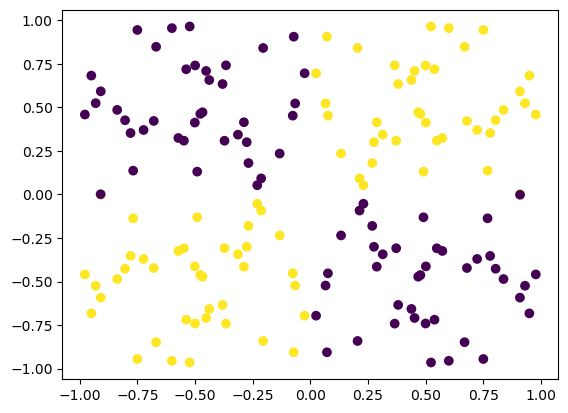

In [4]:
plt.scatter(*zip(*X), c=y)

In [5]:
num_layers = [1,2,3,4,5]
scores_2 = []
for num_layer in num_layers:
        
    # build model and evaluate
    model = Sequential()
    
    i = 0
    while i < num_layer:
        model.add(Dense(2, input_dim=2, activation='tanh'))
        print(num_layer)
        i = i + 1
        print(i)
        
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
   # print(model.predict(X).reshape(4*n))
        
    score = model.evaluate(X, y)
    scores_2.append(score)

2023-04-07 22:56:21.666996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1
1


2023-04-07 22:56:22.248435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
80/80 [==============================] - 0s 622us/step - loss: 4.1128
Epoch 2/400
80/80 [==============================] - 0s 589us/step - loss: 4.0889
Epoch 3/400
80/80 [==============================] - 0s 584us/step - loss: 4.0729
Epoch 4/400
80/80 [==============================] - 0s 590us/step - loss: 4.0626
Epoch 5/400
80/80 [==============================] - 0s 624us/step - loss: 4.0562
Epoch 6/400
80/80 [==============================] - 0s 575us/step - loss: 4.0518
Epoch 7/400
80/80 [==============================] - 0s 572us/step - loss: 4.0483
Epoch 8/400
80/80 [==============================] - 0s 579us/step - loss: 4.0459
Epoch 9/400
80/80 [==============================] - 0s 611us/step - loss: 4.0437
Epoch 10/400
80/80 [==============================] - 0s 605us/step - loss: 4.0415
Epoch 11/400
80/80 [==============================] - 0s 609us/step - loss: 4.0397
Epoch 12/400
80/80 [==============================] - 0s 598us/step - loss: 4.0385
Epoch 13/400


80/80 [==============================] - 0s 563us/step - loss: 4.0117
Epoch 100/400
80/80 [==============================] - 0s 571us/step - loss: 4.0112
Epoch 101/400
80/80 [==============================] - 0s 553us/step - loss: 4.0116
Epoch 102/400
80/80 [==============================] - 0s 563us/step - loss: 4.0112
Epoch 103/400
80/80 [==============================] - 0s 568us/step - loss: 4.0114
Epoch 104/400
80/80 [==============================] - 0s 561us/step - loss: 4.0114
Epoch 105/400
80/80 [==============================] - 0s 558us/step - loss: 4.0113
Epoch 106/400
80/80 [==============================] - 0s 542us/step - loss: 4.0111
Epoch 107/400
80/80 [==============================] - 0s 564us/step - loss: 4.0111
Epoch 108/400
80/80 [==============================] - 0s 555us/step - loss: 4.0111
Epoch 109/400
80/80 [==============================] - 0s 561us/step - loss: 4.0107
Epoch 110/400
80/80 [==============================] - 0s 553us/step - loss: 4.0110
Epoch 

80/80 [==============================] - 0s 558us/step - loss: 4.0085
Epoch 197/400
80/80 [==============================] - 0s 581us/step - loss: 4.0089
Epoch 198/400
80/80 [==============================] - 0s 564us/step - loss: 4.0084
Epoch 199/400
80/80 [==============================] - 0s 553us/step - loss: 4.0089
Epoch 200/400
80/80 [==============================] - 0s 555us/step - loss: 4.0087
Epoch 201/400
80/80 [==============================] - 0s 560us/step - loss: 4.0088
Epoch 202/400
80/80 [==============================] - 0s 569us/step - loss: 4.0089
Epoch 203/400
80/80 [==============================] - 0s 560us/step - loss: 4.0085
Epoch 204/400
80/80 [==============================] - 0s 564us/step - loss: 4.0083
Epoch 205/400
80/80 [==============================] - 0s 554us/step - loss: 4.0088
Epoch 206/400
80/80 [==============================] - 0s 564us/step - loss: 4.0086
Epoch 207/400
80/80 [==============================] - 0s 556us/step - loss: 4.0087
Epoch 

80/80 [==============================] - 0s 555us/step - loss: 4.0082
Epoch 294/400
80/80 [==============================] - 0s 580us/step - loss: 4.0083
Epoch 295/400
80/80 [==============================] - 0s 563us/step - loss: 4.0081
Epoch 296/400
80/80 [==============================] - 0s 565us/step - loss: 4.0080
Epoch 297/400
80/80 [==============================] - 0s 565us/step - loss: 4.0079
Epoch 298/400
80/80 [==============================] - 0s 558us/step - loss: 4.0082
Epoch 299/400
80/80 [==============================] - 0s 574us/step - loss: 4.0082
Epoch 300/400
80/80 [==============================] - 0s 561us/step - loss: 4.0084
Epoch 301/400
80/80 [==============================] - 0s 564us/step - loss: 4.0080
Epoch 302/400
80/80 [==============================] - 0s 559us/step - loss: 4.0080
Epoch 303/400
80/80 [==============================] - 0s 554us/step - loss: 4.0076
Epoch 304/400
80/80 [==============================] - 0s 559us/step - loss: 4.0077
Epoch 

80/80 [==============================] - 0s 549us/step - loss: 4.0079
Epoch 391/400
80/80 [==============================] - 0s 580us/step - loss: 4.0082
Epoch 392/400
80/80 [==============================] - 0s 558us/step - loss: 4.0083
Epoch 393/400
80/80 [==============================] - 0s 561us/step - loss: 4.0081
Epoch 394/400
80/80 [==============================] - 0s 550us/step - loss: 4.0084
Epoch 395/400
80/80 [==============================] - 0s 568us/step - loss: 4.0083
Epoch 396/400
80/80 [==============================] - 0s 575us/step - loss: 4.0076
Epoch 397/400
80/80 [==============================] - 0s 556us/step - loss: 4.0083
Epoch 398/400
80/80 [==============================] - 0s 559us/step - loss: 4.0083
Epoch 399/400
80/80 [==============================] - 0s 549us/step - loss: 4.0075
Epoch 400/400
5/5 [==============================] - 0s 816us/step - loss: 4.0063
2
1
2
2
Epoch 1/400
80/80 [==============================] - 0s 656us/step - loss: 4.1345
Ep

Epoch 88/400
80/80 [==============================] - 0s 621us/step - loss: 2.3545
Epoch 89/400
80/80 [==============================] - 0s 626us/step - loss: 2.3464
Epoch 90/400
80/80 [==============================] - 0s 610us/step - loss: 2.3347
Epoch 91/400
80/80 [==============================] - 0s 608us/step - loss: 2.0675
Epoch 92/400
80/80 [==============================] - 0s 604us/step - loss: 1.6353
Epoch 93/400
80/80 [==============================] - 0s 578us/step - loss: 1.1305
Epoch 94/400
80/80 [==============================] - 0s 599us/step - loss: 0.7950
Epoch 95/400
80/80 [==============================] - 0s 585us/step - loss: 0.6966
Epoch 96/400
80/80 [==============================] - 0s 578us/step - loss: 0.6900
Epoch 97/400
80/80 [==============================] - 0s 554us/step - loss: 0.6848
Epoch 98/400
80/80 [==============================] - 0s 543us/step - loss: 0.6831
Epoch 99/400
80/80 [==============================] - 0s 595us/step - loss: 0.6794
Epoc

80/80 [==============================] - 0s 590us/step - loss: 0.6021
Epoch 186/400
80/80 [==============================] - 0s 591us/step - loss: 0.6055
Epoch 187/400
80/80 [==============================] - 0s 590us/step - loss: 0.6040
Epoch 188/400
80/80 [==============================] - 0s 583us/step - loss: 0.6026
Epoch 189/400
80/80 [==============================] - 0s 593us/step - loss: 0.5997
Epoch 190/400
80/80 [==============================] - 0s 593us/step - loss: 0.6039
Epoch 191/400
80/80 [==============================] - 0s 586us/step - loss: 0.6001
Epoch 192/400
80/80 [==============================] - 0s 592us/step - loss: 0.6043
Epoch 193/400
80/80 [==============================] - 0s 582us/step - loss: 0.6045
Epoch 194/400
80/80 [==============================] - 0s 586us/step - loss: 0.6015
Epoch 195/400
80/80 [==============================] - 0s 601us/step - loss: 0.6026
Epoch 196/400
80/80 [==============================] - 0s 583us/step - loss: 0.6012
Epoch 

80/80 [==============================] - 0s 578us/step - loss: 0.5862
Epoch 283/400
80/80 [==============================] - 0s 592us/step - loss: 0.5811
Epoch 284/400
80/80 [==============================] - 0s 580us/step - loss: 0.5823
Epoch 285/400
80/80 [==============================] - 0s 575us/step - loss: 0.5810
Epoch 286/400
80/80 [==============================] - 0s 602us/step - loss: 0.5833
Epoch 287/400
80/80 [==============================] - 0s 586us/step - loss: 0.5786
Epoch 288/400
80/80 [==============================] - 0s 621us/step - loss: 0.5806
Epoch 289/400
80/80 [==============================] - 0s 623us/step - loss: 0.5768
Epoch 290/400
80/80 [==============================] - 0s 619us/step - loss: 0.5815
Epoch 291/400
80/80 [==============================] - 0s 605us/step - loss: 0.5786
Epoch 292/400
80/80 [==============================] - 0s 610us/step - loss: 0.5818
Epoch 293/400
80/80 [==============================] - 0s 607us/step - loss: 0.5774
Epoch 

80/80 [==============================] - 0s 582us/step - loss: 0.3273
Epoch 380/400
80/80 [==============================] - 0s 574us/step - loss: 0.3393
Epoch 381/400
80/80 [==============================] - 0s 546us/step - loss: 0.3367
Epoch 382/400
80/80 [==============================] - 0s 586us/step - loss: 0.3368
Epoch 383/400
80/80 [==============================] - 0s 604us/step - loss: 0.6722
Epoch 384/400
80/80 [==============================] - 0s 600us/step - loss: 2.2765
Epoch 385/400
80/80 [==============================] - 0s 590us/step - loss: 1.8104
Epoch 386/400
80/80 [==============================] - 0s 586us/step - loss: 1.3135
Epoch 387/400
80/80 [==============================] - 0s 587us/step - loss: 0.8571
Epoch 388/400
80/80 [==============================] - 0s 591us/step - loss: 0.5726
Epoch 389/400
80/80 [==============================] - 0s 588us/step - loss: 0.4751
Epoch 390/400
80/80 [==============================] - 0s 584us/step - loss: 0.4386
Epoch 

80/80 [==============================] - 0s 614us/step - loss: 0.5727
Epoch 77/400
80/80 [==============================] - 0s 632us/step - loss: 0.5702
Epoch 78/400
80/80 [==============================] - 0s 614us/step - loss: 0.5686
Epoch 79/400
80/80 [==============================] - 0s 613us/step - loss: 0.5663
Epoch 80/400
80/80 [==============================] - 0s 611us/step - loss: 0.5658
Epoch 81/400
80/80 [==============================] - 0s 609us/step - loss: 0.5632
Epoch 82/400
80/80 [==============================] - 0s 615us/step - loss: 0.5607
Epoch 83/400
80/80 [==============================] - 0s 617us/step - loss: 0.5575
Epoch 84/400
80/80 [==============================] - 0s 610us/step - loss: 0.5529
Epoch 85/400
80/80 [==============================] - 0s 619us/step - loss: 0.5534
Epoch 86/400
80/80 [==============================] - 0s 616us/step - loss: 0.5466
Epoch 87/400
80/80 [==============================] - 0s 618us/step - loss: 0.5429
Epoch 88/400
80/8

Epoch 174/400
80/80 [==============================] - 0s 569us/step - loss: 0.4954
Epoch 175/400
80/80 [==============================] - 0s 573us/step - loss: 0.4572
Epoch 176/400
80/80 [==============================] - 0s 572us/step - loss: 0.4246
Epoch 177/400
80/80 [==============================] - 0s 595us/step - loss: 0.5450
Epoch 178/400
80/80 [==============================] - 0s 717us/step - loss: 0.4816
Epoch 179/400
80/80 [==============================] - 0s 682us/step - loss: 0.5512
Epoch 180/400
80/80 [==============================] - 0s 622us/step - loss: 0.5022
Epoch 181/400
80/80 [==============================] - 0s 633us/step - loss: 0.4637
Epoch 182/400
80/80 [==============================] - 0s 649us/step - loss: 3.0295
Epoch 183/400
80/80 [==============================] - 0s 632us/step - loss: 3.9680
Epoch 184/400
80/80 [==============================] - 0s 612us/step - loss: 2.8280
Epoch 185/400
80/80 [==============================] - 0s 645us/step - loss:

80/80 [==============================] - 0s 615us/step - loss: 0.6894
Epoch 272/400
80/80 [==============================] - 0s 643us/step - loss: 0.6885
Epoch 273/400
80/80 [==============================] - 0s 618us/step - loss: 0.6912
Epoch 274/400
80/80 [==============================] - 0s 604us/step - loss: 0.6890
Epoch 275/400
80/80 [==============================] - 0s 607us/step - loss: 0.6913
Epoch 276/400
80/80 [==============================] - 0s 582us/step - loss: 0.6899
Epoch 277/400
80/80 [==============================] - 0s 622us/step - loss: 0.6892
Epoch 278/400
80/80 [==============================] - 0s 611us/step - loss: 0.6870
Epoch 279/400
80/80 [==============================] - 0s 615us/step - loss: 0.6825
Epoch 280/400
80/80 [==============================] - 0s 609us/step - loss: 0.6929
Epoch 281/400
80/80 [==============================] - 0s 608us/step - loss: 0.6899
Epoch 282/400
80/80 [==============================] - 0s 612us/step - loss: 0.6884
Epoch 

80/80 [==============================] - 0s 613us/step - loss: 0.6949
Epoch 369/400
80/80 [==============================] - 0s 630us/step - loss: 0.6918
Epoch 370/400
80/80 [==============================] - 0s 614us/step - loss: 0.6919
Epoch 371/400
80/80 [==============================] - 0s 617us/step - loss: 0.6922
Epoch 372/400
80/80 [==============================] - 0s 601us/step - loss: 0.6920
Epoch 373/400
80/80 [==============================] - 0s 567us/step - loss: 0.6922
Epoch 374/400
80/80 [==============================] - 0s 561us/step - loss: 0.6914
Epoch 375/400
80/80 [==============================] - 0s 548us/step - loss: 0.6899
Epoch 376/400
80/80 [==============================] - 0s 569us/step - loss: 0.6887
Epoch 377/400
80/80 [==============================] - 0s 574us/step - loss: 0.6884
Epoch 378/400
80/80 [==============================] - 0s 611us/step - loss: 0.6874
Epoch 379/400
80/80 [==============================] - 0s 604us/step - loss: 0.6876
Epoch 

80/80 [==============================] - 0s 629us/step - loss: 0.1360
Epoch 66/400
80/80 [==============================] - 0s 647us/step - loss: 0.1130
Epoch 67/400
80/80 [==============================] - 0s 630us/step - loss: 0.1046
Epoch 68/400
80/80 [==============================] - 0s 632us/step - loss: 0.1067
Epoch 69/400
80/80 [==============================] - 0s 645us/step - loss: 0.0986
Epoch 70/400
80/80 [==============================] - 0s 651us/step - loss: 0.0992
Epoch 71/400
80/80 [==============================] - 0s 653us/step - loss: 0.0969
Epoch 72/400
80/80 [==============================] - 0s 620us/step - loss: 0.0924
Epoch 73/400
80/80 [==============================] - 0s 628us/step - loss: 0.0932
Epoch 74/400
80/80 [==============================] - 0s 625us/step - loss: 0.0883
Epoch 75/400
80/80 [==============================] - 0s 655us/step - loss: 0.0843
Epoch 76/400
80/80 [==============================] - 0s 648us/step - loss: 0.0814
Epoch 77/400
80/8

80/80 [==============================] - 0s 603us/step - loss: 0.3953
Epoch 164/400
80/80 [==============================] - 0s 644us/step - loss: 0.3950
Epoch 165/400
80/80 [==============================] - 0s 645us/step - loss: 0.3946
Epoch 166/400
80/80 [==============================] - 0s 625us/step - loss: 0.3908
Epoch 167/400
80/80 [==============================] - 0s 619us/step - loss: 0.3990
Epoch 168/400
80/80 [==============================] - 0s 629us/step - loss: 0.4005
Epoch 169/400
80/80 [==============================] - 0s 621us/step - loss: 0.3941
Epoch 170/400
80/80 [==============================] - 0s 631us/step - loss: 0.3904
Epoch 171/400
80/80 [==============================] - 0s 624us/step - loss: 0.3957
Epoch 172/400
80/80 [==============================] - 0s 589us/step - loss: 0.3915
Epoch 173/400
80/80 [==============================] - 0s 585us/step - loss: 0.3851
Epoch 174/400
80/80 [==============================] - 0s 606us/step - loss: 0.3938
Epoch 

80/80 [==============================] - 0s 653us/step - loss: 0.6980
Epoch 261/400
80/80 [==============================] - 0s 656us/step - loss: 0.6993
Epoch 262/400
80/80 [==============================] - 0s 633us/step - loss: 0.6986
Epoch 263/400
80/80 [==============================] - 0s 629us/step - loss: 0.6982
Epoch 264/400
80/80 [==============================] - 0s 617us/step - loss: 0.7024
Epoch 265/400
80/80 [==============================] - 0s 625us/step - loss: 0.7004
Epoch 266/400
80/80 [==============================] - 0s 620us/step - loss: 0.7004
Epoch 267/400
80/80 [==============================] - 0s 622us/step - loss: 0.6998
Epoch 268/400
80/80 [==============================] - 0s 646us/step - loss: 0.6965
Epoch 269/400
80/80 [==============================] - 0s 649us/step - loss: 0.7012
Epoch 270/400
80/80 [==============================] - 0s 661us/step - loss: 0.6952
Epoch 271/400
80/80 [==============================] - 0s 654us/step - loss: 0.6997
Epoch 

80/80 [==============================] - 0s 648us/step - loss: 0.7027
Epoch 358/400
80/80 [==============================] - 0s 633us/step - loss: 0.7000
Epoch 359/400
80/80 [==============================] - 0s 615us/step - loss: 0.7009
Epoch 360/400
80/80 [==============================] - 0s 595us/step - loss: 0.7015
Epoch 361/400
80/80 [==============================] - 0s 598us/step - loss: 0.6978
Epoch 362/400
80/80 [==============================] - 0s 651us/step - loss: 0.7020
Epoch 363/400
80/80 [==============================] - 0s 649us/step - loss: 0.7008
Epoch 364/400
80/80 [==============================] - 0s 652us/step - loss: 0.6995
Epoch 365/400
80/80 [==============================] - 0s 591us/step - loss: 0.7006
Epoch 366/400
80/80 [==============================] - 0s 630us/step - loss: 0.7022
Epoch 367/400
80/80 [==============================] - 0s 630us/step - loss: 0.7028
Epoch 368/400
80/80 [==============================] - 0s 622us/step - loss: 0.7006
Epoch 

80/80 [==============================] - 0s 654us/step - loss: 4.1764
Epoch 55/400
80/80 [==============================] - 0s 692us/step - loss: 4.1748
Epoch 56/400
80/80 [==============================] - 0s 671us/step - loss: 4.1745
Epoch 57/400
80/80 [==============================] - 0s 665us/step - loss: 4.1715
Epoch 58/400
80/80 [==============================] - 0s 668us/step - loss: 4.1716
Epoch 59/400
80/80 [==============================] - 0s 668us/step - loss: 4.1718
Epoch 60/400
80/80 [==============================] - 0s 677us/step - loss: 4.1708
Epoch 61/400
80/80 [==============================] - 0s 670us/step - loss: 4.1698
Epoch 62/400
80/80 [==============================] - 0s 672us/step - loss: 4.1685
Epoch 63/400
80/80 [==============================] - 0s 674us/step - loss: 4.1681
Epoch 64/400
80/80 [==============================] - 0s 683us/step - loss: 4.1652
Epoch 65/400
80/80 [==============================] - 0s 683us/step - loss: 4.1648
Epoch 66/400
80/8

80/80 [==============================] - 0s 701us/step - loss: 4.1497
Epoch 153/400
80/80 [==============================] - 0s 686us/step - loss: 4.1472
Epoch 154/400
80/80 [==============================] - 0s 683us/step - loss: 4.1719
Epoch 155/400
80/80 [==============================] - 0s 682us/step - loss: 4.1495
Epoch 156/400
80/80 [==============================] - 0s 680us/step - loss: 4.1520
Epoch 157/400
80/80 [==============================] - 0s 674us/step - loss: 4.1486
Epoch 158/400
80/80 [==============================] - 0s 668us/step - loss: 4.1494
Epoch 159/400
80/80 [==============================] - 0s 681us/step - loss: 4.1458
Epoch 160/400
80/80 [==============================] - 0s 682us/step - loss: 4.1652
Epoch 161/400
80/80 [==============================] - 0s 666us/step - loss: 4.1457
Epoch 162/400
80/80 [==============================] - 0s 671us/step - loss: 4.1473
Epoch 163/400
80/80 [==============================] - 0s 656us/step - loss: 4.1875
Epoch 

80/80 [==============================] - 0s 686us/step - loss: 4.2066
Epoch 250/400
80/80 [==============================] - 0s 693us/step - loss: 4.2045
Epoch 251/400
80/80 [==============================] - 0s 673us/step - loss: 4.2073
Epoch 252/400
80/80 [==============================] - 0s 699us/step - loss: 4.2063
Epoch 253/400
80/80 [==============================] - 0s 674us/step - loss: 4.2064
Epoch 254/400
80/80 [==============================] - 0s 675us/step - loss: 4.2060
Epoch 255/400
80/80 [==============================] - 0s 673us/step - loss: 4.2057
Epoch 256/400
80/80 [==============================] - 0s 676us/step - loss: 4.2056
Epoch 257/400
80/80 [==============================] - 0s 685us/step - loss: 4.2063
Epoch 258/400
80/80 [==============================] - 0s 676us/step - loss: 4.2067
Epoch 259/400
80/80 [==============================] - 0s 673us/step - loss: 4.2073
Epoch 260/400
80/80 [==============================] - 0s 667us/step - loss: 4.2067
Epoch 

80/80 [==============================] - 0s 676us/step - loss: 4.2054
Epoch 347/400
80/80 [==============================] - 0s 686us/step - loss: 4.2066
Epoch 348/400
80/80 [==============================] - 0s 676us/step - loss: 4.2049
Epoch 349/400
80/80 [==============================] - 0s 672us/step - loss: 4.2054
Epoch 350/400
80/80 [==============================] - 0s 664us/step - loss: 4.2070
Epoch 351/400
80/80 [==============================] - 0s 666us/step - loss: 4.2068
Epoch 352/400
80/80 [==============================] - 0s 671us/step - loss: 4.2057
Epoch 353/400
80/80 [==============================] - 0s 682us/step - loss: 4.2034
Epoch 354/400
80/80 [==============================] - 0s 654us/step - loss: 4.2059
Epoch 355/400
80/80 [==============================] - 0s 668us/step - loss: 4.2069
Epoch 356/400
80/80 [==============================] - 0s 675us/step - loss: 4.2064
Epoch 357/400
80/80 [==============================] - 0s 671us/step - loss: 4.2054
Epoch 

In [6]:
# plot scores
scores_2

[4.006331443786621,
 0.3380340039730072,
 0.6530135869979858,
 0.6938508749008179,
 4.2028303146362305]

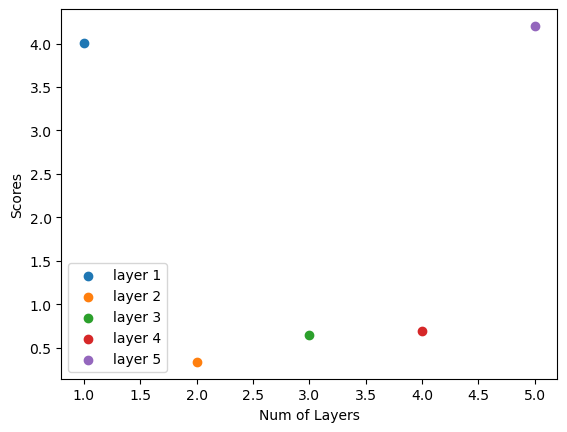

In [7]:
plt.figure()
plt.scatter(num_layers[0], scores_2[0], label='layer 1')
plt.scatter(num_layers[1], scores_2[1], label='layer 2')
plt.scatter(num_layers[2], scores_2[2], label='layer 3')
plt.scatter(num_layers[3], scores_2[3], label='layer 4')
plt.scatter(num_layers[4], scores_2[4], label='layer 5')
plt.xlabel("Num of Layers")
plt.ylabel("Scores")
plt.legend()

In [8]:
# 3 neurons
num_layers = [1,2,3,4,5]
scores_3 = []
for num_layer in num_layers:
        
    # build model and evaluate
    model = Sequential()
    
    i = 0
    while i < num_layer:
        model.add(Dense(3, input_dim=2, activation='tanh'))
        print(num_layer)
        i = i + 1
        print(i)
        
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
   # print(model.predict(X).reshape(4*n))
        
    score = model.evaluate(X, y)
    scores_3.append(score)

1
1
Epoch 1/400
80/80 [==============================] - 0s 625us/step - loss: 1.7182
Epoch 2/400
80/80 [==============================] - 0s 619us/step - loss: 0.8244
Epoch 3/400
80/80 [==============================] - 0s 602us/step - loss: 0.7796
Epoch 4/400
80/80 [==============================] - 0s 614us/step - loss: 0.7526
Epoch 5/400
80/80 [==============================] - 0s 586us/step - loss: 0.7350
Epoch 6/400
80/80 [==============================] - 0s 586us/step - loss: 0.7229
Epoch 7/400
80/80 [==============================] - 0s 577us/step - loss: 0.7141
Epoch 8/400
80/80 [==============================] - 0s 590us/step - loss: 0.7084
Epoch 9/400
80/80 [==============================] - 0s 589us/step - loss: 0.7051
Epoch 10/400
80/80 [==============================] - 0s 577us/step - loss: 0.7026
Epoch 11/400
80/80 [==============================] - 0s 574us/step - loss: 0.7015
Epoch 12/400
80/80 [==============================] - 0s 567us/step - loss: 0.7000
Epoch 13/

80/80 [==============================] - 0s 561us/step - loss: 0.6957
Epoch 100/400
80/80 [==============================] - 0s 565us/step - loss: 0.6966
Epoch 101/400
80/80 [==============================] - 0s 580us/step - loss: 0.6962
Epoch 102/400
80/80 [==============================] - 0s 564us/step - loss: 0.6955
Epoch 103/400
80/80 [==============================] - 0s 566us/step - loss: 0.6966
Epoch 104/400
80/80 [==============================] - 0s 541us/step - loss: 0.6956
Epoch 105/400
80/80 [==============================] - 0s 557us/step - loss: 0.6961
Epoch 106/400
80/80 [==============================] - 0s 571us/step - loss: 0.6959
Epoch 107/400
80/80 [==============================] - 0s 573us/step - loss: 0.6960
Epoch 108/400
80/80 [==============================] - 0s 569us/step - loss: 0.6957
Epoch 109/400
80/80 [==============================] - 0s 566us/step - loss: 0.6960
Epoch 110/400
80/80 [==============================] - 0s 564us/step - loss: 0.6962
Epoch 

80/80 [==============================] - 0s 572us/step - loss: 0.6961
Epoch 197/400
80/80 [==============================] - 0s 580us/step - loss: 0.6963
Epoch 198/400
80/80 [==============================] - 0s 558us/step - loss: 0.6960
Epoch 199/400
80/80 [==============================] - 0s 566us/step - loss: 0.6961
Epoch 200/400
80/80 [==============================] - 0s 564us/step - loss: 0.6963
Epoch 201/400
80/80 [==============================] - 0s 571us/step - loss: 0.6961
Epoch 202/400
80/80 [==============================] - 0s 575us/step - loss: 0.6961
Epoch 203/400
80/80 [==============================] - 0s 563us/step - loss: 0.6957
Epoch 204/400
80/80 [==============================] - 0s 566us/step - loss: 0.6962
Epoch 205/400
80/80 [==============================] - 0s 551us/step - loss: 0.6962
Epoch 206/400
80/80 [==============================] - 0s 559us/step - loss: 0.6965
Epoch 207/400
80/80 [==============================] - 0s 578us/step - loss: 0.6961
Epoch 

80/80 [==============================] - 0s 568us/step - loss: 0.6955
Epoch 294/400
80/80 [==============================] - 0s 578us/step - loss: 0.6955
Epoch 295/400
80/80 [==============================] - 0s 555us/step - loss: 0.6961
Epoch 296/400
80/80 [==============================] - 0s 549us/step - loss: 0.6960
Epoch 297/400
80/80 [==============================] - 0s 564us/step - loss: 0.6961
Epoch 298/400
80/80 [==============================] - 0s 571us/step - loss: 0.6959
Epoch 299/400
80/80 [==============================] - 0s 548us/step - loss: 0.6961
Epoch 300/400
80/80 [==============================] - 0s 565us/step - loss: 0.6960
Epoch 301/400
80/80 [==============================] - 0s 553us/step - loss: 0.6956
Epoch 302/400
80/80 [==============================] - 0s 568us/step - loss: 0.6961
Epoch 303/400
80/80 [==============================] - 0s 554us/step - loss: 0.6955
Epoch 304/400
80/80 [==============================] - 0s 562us/step - loss: 0.6954
Epoch 

80/80 [==============================] - 0s 557us/step - loss: 0.6960
Epoch 391/400
80/80 [==============================] - 0s 571us/step - loss: 0.6955
Epoch 392/400
80/80 [==============================] - 0s 563us/step - loss: 0.6957
Epoch 393/400
80/80 [==============================] - 0s 568us/step - loss: 0.6959
Epoch 394/400
80/80 [==============================] - 0s 568us/step - loss: 0.6956
Epoch 395/400
80/80 [==============================] - 0s 570us/step - loss: 0.6954
Epoch 396/400
80/80 [==============================] - 0s 558us/step - loss: 0.6959
Epoch 397/400
80/80 [==============================] - 0s 570us/step - loss: 0.6959
Epoch 398/400
80/80 [==============================] - 0s 566us/step - loss: 0.6965
Epoch 399/400
80/80 [==============================] - 0s 567us/step - loss: 0.6964
Epoch 400/400
5/5 [==============================] - 0s 779us/step - loss: 0.6931
2
1
2
2
Epoch 1/400
80/80 [==============================] - 0s 612us/step - loss: 3.2665
Ep

80/80 [==============================] - 0s 594us/step - loss: 2.6985
Epoch 88/400
80/80 [==============================] - 0s 598us/step - loss: 2.6988
Epoch 89/400
80/80 [==============================] - 0s 596us/step - loss: 2.6979
Epoch 90/400
80/80 [==============================] - 0s 589us/step - loss: 2.6973
Epoch 91/400
80/80 [==============================] - 0s 587us/step - loss: 2.6966
Epoch 92/400
80/80 [==============================] - 0s 580us/step - loss: 2.6958
Epoch 93/400
80/80 [==============================] - 0s 586us/step - loss: 2.6955
Epoch 94/400
80/80 [==============================] - 0s 591us/step - loss: 2.6948
Epoch 95/400
80/80 [==============================] - 0s 594us/step - loss: 2.6938
Epoch 96/400
80/80 [==============================] - 0s 591us/step - loss: 2.6937
Epoch 97/400
80/80 [==============================] - 0s 592us/step - loss: 2.6932
Epoch 98/400
80/80 [==============================] - 0s 595us/step - loss: 2.6925
Epoch 99/400
80/8

80/80 [==============================] - 0s 589us/step - loss: 2.6680
Epoch 185/400
80/80 [==============================] - 0s 586us/step - loss: 2.6680
Epoch 186/400
80/80 [==============================] - 0s 594us/step - loss: 2.6674
Epoch 187/400
80/80 [==============================] - 0s 614us/step - loss: 2.6674
Epoch 188/400
80/80 [==============================] - 0s 591us/step - loss: 2.6673
Epoch 189/400
80/80 [==============================] - 0s 585us/step - loss: 2.6672
Epoch 190/400
80/80 [==============================] - 0s 590us/step - loss: 2.6667
Epoch 191/400
80/80 [==============================] - 0s 589us/step - loss: 2.6666
Epoch 192/400
80/80 [==============================] - 0s 576us/step - loss: 2.6661
Epoch 193/400
80/80 [==============================] - 0s 595us/step - loss: 2.6666
Epoch 194/400
80/80 [==============================] - 0s 585us/step - loss: 2.6657
Epoch 195/400
80/80 [==============================] - 0s 547us/step - loss: 2.6665
Epoch 

80/80 [==============================] - 0s 587us/step - loss: 2.6564
Epoch 282/400
80/80 [==============================] - 0s 605us/step - loss: 2.6568
Epoch 283/400
80/80 [==============================] - 0s 588us/step - loss: 2.6569
Epoch 284/400
80/80 [==============================] - 0s 581us/step - loss: 2.6557
Epoch 285/400
80/80 [==============================] - 0s 582us/step - loss: 2.6564
Epoch 286/400
80/80 [==============================] - 0s 589us/step - loss: 2.6565
Epoch 287/400
80/80 [==============================] - 0s 589us/step - loss: 2.6560
Epoch 288/400
80/80 [==============================] - 0s 591us/step - loss: 2.6560
Epoch 289/400
80/80 [==============================] - 0s 590us/step - loss: 2.6552
Epoch 290/400
80/80 [==============================] - 0s 606us/step - loss: 2.6562
Epoch 291/400
80/80 [==============================] - 0s 592us/step - loss: 2.6557
Epoch 292/400
80/80 [==============================] - 0s 589us/step - loss: 2.6558
Epoch 

80/80 [==============================] - 0s 581us/step - loss: 2.6506
Epoch 379/400
80/80 [==============================] - 0s 604us/step - loss: 2.6510
Epoch 380/400
80/80 [==============================] - 0s 592us/step - loss: 2.6507
Epoch 381/400
80/80 [==============================] - 0s 584us/step - loss: 2.6506
Epoch 382/400
80/80 [==============================] - 0s 591us/step - loss: 2.6505
Epoch 383/400
80/80 [==============================] - 0s 591us/step - loss: 2.6505
Epoch 384/400
80/80 [==============================] - 0s 596us/step - loss: 2.6505
Epoch 385/400
80/80 [==============================] - 0s 584us/step - loss: 2.6505
Epoch 386/400
80/80 [==============================] - 0s 596us/step - loss: 2.6507
Epoch 387/400
80/80 [==============================] - 0s 584us/step - loss: 2.6502
Epoch 388/400
80/80 [==============================] - 0s 582us/step - loss: 2.6504
Epoch 389/400
80/80 [==============================] - 0s 573us/step - loss: 2.6501
Epoch 

80/80 [==============================] - 0s 617us/step - loss: 0.1349
Epoch 76/400
80/80 [==============================] - 0s 632us/step - loss: 0.1336
Epoch 77/400
80/80 [==============================] - 0s 612us/step - loss: 0.1466
Epoch 78/400
80/80 [==============================] - 0s 633us/step - loss: 0.1464
Epoch 79/400
80/80 [==============================] - 0s 653us/step - loss: 0.1440
Epoch 80/400
80/80 [==============================] - 0s 617us/step - loss: 0.1395
Epoch 81/400
80/80 [==============================] - 0s 619us/step - loss: 0.1333
Epoch 82/400
80/80 [==============================] - 0s 619us/step - loss: 0.1481
Epoch 83/400
80/80 [==============================] - 0s 624us/step - loss: 0.1371
Epoch 84/400
80/80 [==============================] - 0s 612us/step - loss: 1.6861
Epoch 85/400
80/80 [==============================] - 0s 609us/step - loss: 1.8003
Epoch 86/400
80/80 [==============================] - 0s 606us/step - loss: 1.1159
Epoch 87/400
80/8

Epoch 173/400
80/80 [==============================] - 0s 618us/step - loss: 0.1348
Epoch 174/400
80/80 [==============================] - 0s 647us/step - loss: 0.1364
Epoch 175/400
80/80 [==============================] - 0s 663us/step - loss: 0.1293
Epoch 176/400
80/80 [==============================] - 0s 631us/step - loss: 0.1329
Epoch 177/400
80/80 [==============================] - 0s 629us/step - loss: 0.1282
Epoch 178/400
80/80 [==============================] - 0s 607us/step - loss: 0.1470
Epoch 179/400
80/80 [==============================] - 0s 619us/step - loss: 0.1291
Epoch 180/400
80/80 [==============================] - 0s 620us/step - loss: 0.1288
Epoch 181/400
80/80 [==============================] - 0s 589us/step - loss: 0.1277
Epoch 182/400
80/80 [==============================] - 0s 566us/step - loss: 0.1264
Epoch 183/400
80/80 [==============================] - 0s 628us/step - loss: 0.1308
Epoch 184/400
80/80 [==============================] - 0s 622us/step - loss:

80/80 [==============================] - 0s 613us/step - loss: 0.1079
Epoch 271/400
80/80 [==============================] - 0s 622us/step - loss: 0.0963
Epoch 272/400
80/80 [==============================] - 0s 603us/step - loss: 0.1052
Epoch 273/400
80/80 [==============================] - 0s 605us/step - loss: 0.1017
Epoch 274/400
80/80 [==============================] - 0s 621us/step - loss: 0.1877
Epoch 275/400
80/80 [==============================] - 0s 609us/step - loss: 0.0987
Epoch 276/400
80/80 [==============================] - 0s 607us/step - loss: 0.1716
Epoch 277/400
80/80 [==============================] - 0s 620us/step - loss: 0.1278
Epoch 278/400
80/80 [==============================] - 0s 609us/step - loss: 0.1260
Epoch 279/400
80/80 [==============================] - 0s 610us/step - loss: 0.1053
Epoch 280/400
80/80 [==============================] - 0s 604us/step - loss: 0.1015
Epoch 281/400
80/80 [==============================] - 0s 614us/step - loss: 0.0998
Epoch 

80/80 [==============================] - 0s 601us/step - loss: 0.0935
Epoch 368/400
80/80 [==============================] - 0s 623us/step - loss: 0.1026
Epoch 369/400
80/80 [==============================] - 0s 603us/step - loss: 0.0829
Epoch 370/400
80/80 [==============================] - 0s 615us/step - loss: 0.0965
Epoch 371/400
80/80 [==============================] - 0s 615us/step - loss: 0.0923
Epoch 372/400
80/80 [==============================] - 0s 619us/step - loss: 0.1036
Epoch 373/400
80/80 [==============================] - 0s 612us/step - loss: 0.0994
Epoch 374/400
80/80 [==============================] - 0s 598us/step - loss: 0.0968
Epoch 375/400
80/80 [==============================] - 0s 581us/step - loss: 0.1268
Epoch 376/400
80/80 [==============================] - 0s 633us/step - loss: 0.1011
Epoch 377/400
80/80 [==============================] - 0s 618us/step - loss: 0.0939
Epoch 378/400
80/80 [==============================] - 0s 619us/step - loss: 0.0953
Epoch 

80/80 [==============================] - 0s 616us/step - loss: 0.5503
Epoch 65/400
80/80 [==============================] - 0s 660us/step - loss: 0.5437
Epoch 66/400
80/80 [==============================] - 0s 633us/step - loss: 0.5426
Epoch 67/400
80/80 [==============================] - 0s 625us/step - loss: 0.5378
Epoch 68/400
80/80 [==============================] - 0s 628us/step - loss: 0.5535
Epoch 69/400
80/80 [==============================] - 0s 653us/step - loss: 0.5442
Epoch 70/400
80/80 [==============================] - 0s 646us/step - loss: 0.5375
Epoch 71/400
80/80 [==============================] - 0s 631us/step - loss: 0.5372
Epoch 72/400
80/80 [==============================] - 0s 646us/step - loss: 0.5356
Epoch 73/400
80/80 [==============================] - 0s 646us/step - loss: 0.5331
Epoch 74/400
80/80 [==============================] - 0s 630us/step - loss: 0.5332
Epoch 75/400
80/80 [==============================] - 0s 632us/step - loss: 0.5326
Epoch 76/400
80/8

80/80 [==============================] - 0s 628us/step - loss: 0.4954
Epoch 163/400
80/80 [==============================] - 0s 659us/step - loss: 0.4920
Epoch 164/400
80/80 [==============================] - 0s 644us/step - loss: 0.4919
Epoch 165/400
80/80 [==============================] - 0s 633us/step - loss: 0.4896
Epoch 166/400
80/80 [==============================] - 0s 621us/step - loss: 0.4892
Epoch 167/400
80/80 [==============================] - 0s 624us/step - loss: 0.4875
Epoch 168/400
80/80 [==============================] - 0s 632us/step - loss: 0.4849
Epoch 169/400
80/80 [==============================] - 0s 624us/step - loss: 0.4828
Epoch 170/400
80/80 [==============================] - 0s 629us/step - loss: 0.4794
Epoch 171/400
80/80 [==============================] - 0s 627us/step - loss: 0.4730
Epoch 172/400
80/80 [==============================] - 0s 629us/step - loss: 0.4678
Epoch 173/400
80/80 [==============================] - 0s 629us/step - loss: 0.4617
Epoch 

80/80 [==============================] - 0s 631us/step - loss: 0.0512
Epoch 260/400
80/80 [==============================] - 0s 626us/step - loss: 0.0460
Epoch 261/400
80/80 [==============================] - 0s 574us/step - loss: 0.0438
Epoch 262/400
80/80 [==============================] - 0s 608us/step - loss: 0.0509
Epoch 263/400
80/80 [==============================] - 0s 599us/step - loss: 0.0443
Epoch 264/400
80/80 [==============================] - 0s 651us/step - loss: 0.0462
Epoch 265/400
80/80 [==============================] - 0s 634us/step - loss: 0.0441
Epoch 266/400
80/80 [==============================] - 0s 631us/step - loss: 0.0477
Epoch 267/400
80/80 [==============================] - 0s 632us/step - loss: 0.0457
Epoch 268/400
80/80 [==============================] - 0s 666us/step - loss: 0.0453
Epoch 269/400
80/80 [==============================] - 0s 647us/step - loss: 0.0419
Epoch 270/400
80/80 [==============================] - 0s 652us/step - loss: 0.0459
Epoch 

80/80 [==============================] - 0s 671us/step - loss: 0.0380
Epoch 357/400
80/80 [==============================] - 0s 650us/step - loss: 0.0481
Epoch 358/400
80/80 [==============================] - 0s 653us/step - loss: 0.0444
Epoch 359/400
80/80 [==============================] - 0s 613us/step - loss: 0.0385
Epoch 360/400
80/80 [==============================] - 0s 591us/step - loss: 0.0346
Epoch 361/400
80/80 [==============================] - 0s 657us/step - loss: 0.0389
Epoch 362/400
80/80 [==============================] - 0s 659us/step - loss: 0.0357
Epoch 363/400
80/80 [==============================] - 0s 664us/step - loss: 0.0422
Epoch 364/400
80/80 [==============================] - 0s 656us/step - loss: 0.0349
Epoch 365/400
80/80 [==============================] - 0s 649us/step - loss: 0.0385
Epoch 366/400
80/80 [==============================] - 0s 658us/step - loss: 0.0391
Epoch 367/400
80/80 [==============================] - 0s 651us/step - loss: 0.0404
Epoch 

80/80 [==============================] - 0s 661us/step - loss: 0.6963
Epoch 54/400
80/80 [==============================] - 0s 682us/step - loss: 0.6956
Epoch 55/400
80/80 [==============================] - 0s 667us/step - loss: 0.6965
Epoch 56/400
80/80 [==============================] - 0s 699us/step - loss: 0.6957
Epoch 57/400
80/80 [==============================] - 0s 703us/step - loss: 0.6947
Epoch 58/400
80/80 [==============================] - 0s 713us/step - loss: 0.6961
Epoch 59/400
80/80 [==============================] - 0s 776us/step - loss: 0.6953
Epoch 60/400
80/80 [==============================] - 0s 723us/step - loss: 0.6950
Epoch 61/400
80/80 [==============================] - 0s 717us/step - loss: 0.6963
Epoch 62/400
80/80 [==============================] - 0s 687us/step - loss: 0.6961
Epoch 63/400
80/80 [==============================] - 0s 679us/step - loss: 0.6950
Epoch 64/400
80/80 [==============================] - 0s 680us/step - loss: 0.6949
Epoch 65/400
80/8

80/80 [==============================] - 0s 687us/step - loss: 0.7031
Epoch 152/400
80/80 [==============================] - 0s 678us/step - loss: 0.7007
Epoch 153/400
80/80 [==============================] - 0s 671us/step - loss: 0.6969
Epoch 154/400
80/80 [==============================] - 0s 681us/step - loss: 0.7005
Epoch 155/400
80/80 [==============================] - 0s 670us/step - loss: 0.7002
Epoch 156/400
80/80 [==============================] - 0s 698us/step - loss: 0.6957
Epoch 157/400
80/80 [==============================] - 0s 657us/step - loss: 0.6995
Epoch 158/400
80/80 [==============================] - 0s 672us/step - loss: 0.7004
Epoch 159/400
80/80 [==============================] - 0s 679us/step - loss: 0.6977
Epoch 160/400
80/80 [==============================] - 0s 681us/step - loss: 0.6954
Epoch 161/400
80/80 [==============================] - 0s 671us/step - loss: 0.6994
Epoch 162/400
80/80 [==============================] - 0s 683us/step - loss: 0.6967
Epoch 

80/80 [==============================] - 0s 686us/step - loss: 0.6948
Epoch 249/400
80/80 [==============================] - 0s 684us/step - loss: 0.6965
Epoch 250/400
80/80 [==============================] - 0s 667us/step - loss: 0.7031
Epoch 251/400
80/80 [==============================] - 0s 685us/step - loss: 0.6982
Epoch 252/400
80/80 [==============================] - 0s 669us/step - loss: 0.6998
Epoch 253/400
80/80 [==============================] - 0s 664us/step - loss: 0.6977
Epoch 254/400
80/80 [==============================] - 0s 665us/step - loss: 0.6977
Epoch 255/400
80/80 [==============================] - 0s 681us/step - loss: 0.6997
Epoch 256/400
80/80 [==============================] - 0s 686us/step - loss: 0.6917
Epoch 257/400
80/80 [==============================] - 0s 671us/step - loss: 0.7015
Epoch 258/400
80/80 [==============================] - 0s 676us/step - loss: 0.7023
Epoch 259/400
80/80 [==============================] - 0s 676us/step - loss: 0.6988
Epoch 

80/80 [==============================] - 0s 668us/step - loss: 0.6978
Epoch 346/400
80/80 [==============================] - 0s 679us/step - loss: 0.7009
Epoch 347/400
80/80 [==============================] - 0s 667us/step - loss: 0.6990
Epoch 348/400
80/80 [==============================] - 0s 685us/step - loss: 0.6983
Epoch 349/400
80/80 [==============================] - 0s 669us/step - loss: 0.6994
Epoch 350/400
80/80 [==============================] - 0s 672us/step - loss: 0.6989
Epoch 351/400
80/80 [==============================] - 0s 644us/step - loss: 0.6967
Epoch 352/400
80/80 [==============================] - 0s 625us/step - loss: 0.6991
Epoch 353/400
80/80 [==============================] - 0s 704us/step - loss: 0.6999
Epoch 354/400
80/80 [==============================] - 0s 679us/step - loss: 0.7011
Epoch 355/400
80/80 [==============================] - 0s 668us/step - loss: 0.7002
Epoch 356/400
80/80 [==============================] - 0s 662us/step - loss: 0.6968
Epoch 

In [9]:
scores_3

[0.6931473016738892,
 2.6472299098968506,
 0.09375002235174179,
 0.03623267635703087,
 0.6944209337234497]

In [10]:
# 4 neurons
num_layers = [1,2,3,4,5]
scores_4 = []
for num_layer in num_layers:
        
    # build model and evaluate
    model = Sequential()
    
    i = 0
    while i < num_layer:
        model.add(Dense(4, input_dim=2, activation='tanh'))
        print(num_layer)
        i = i + 1
        print(i)
        
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
   # print(model.predict(X).reshape(4*n))
        
    score = model.evaluate(X, y)
    scores_4.append(score)

1
1
Epoch 1/400
80/80 [==============================] - 0s 608us/step - loss: 3.9267
Epoch 2/400
80/80 [==============================] - 0s 621us/step - loss: 3.3481
Epoch 3/400
80/80 [==============================] - 0s 591us/step - loss: 3.2724
Epoch 4/400
80/80 [==============================] - 0s 609us/step - loss: 3.2543
Epoch 5/400
80/80 [==============================] - 0s 586us/step - loss: 3.2464
Epoch 6/400
80/80 [==============================] - 0s 599us/step - loss: 3.2399
Epoch 7/400
80/80 [==============================] - 0s 606us/step - loss: 3.2344
Epoch 8/400
80/80 [==============================] - 0s 609us/step - loss: 3.2299
Epoch 9/400
80/80 [==============================] - 0s 611us/step - loss: 3.2265
Epoch 10/400
80/80 [==============================] - 0s 623us/step - loss: 3.2237
Epoch 11/400
80/80 [==============================] - 0s 588us/step - loss: 3.2214
Epoch 12/400
80/80 [==============================] - 0s 575us/step - loss: 3.2192
Epoch 13/

80/80 [==============================] - 0s 564us/step - loss: 3.1871
Epoch 100/400
80/80 [==============================] - 0s 585us/step - loss: 3.1870
Epoch 101/400
80/80 [==============================] - 0s 564us/step - loss: 3.1870
Epoch 102/400
80/80 [==============================] - 0s 562us/step - loss: 3.1869
Epoch 103/400
80/80 [==============================] - 0s 562us/step - loss: 3.1868
Epoch 104/400
80/80 [==============================] - 0s 588us/step - loss: 3.1866
Epoch 105/400
80/80 [==============================] - 0s 582us/step - loss: 3.1867
Epoch 106/400
80/80 [==============================] - 0s 574us/step - loss: 3.1866
Epoch 107/400
80/80 [==============================] - 0s 553us/step - loss: 3.1865
Epoch 108/400
80/80 [==============================] - 0s 553us/step - loss: 3.1864
Epoch 109/400
80/80 [==============================] - 0s 563us/step - loss: 3.1861
Epoch 110/400
80/80 [==============================] - 0s 556us/step - loss: 3.1861
Epoch 

80/80 [==============================] - 0s 578us/step - loss: 3.1819
Epoch 197/400
80/80 [==============================] - 0s 571us/step - loss: 3.1817
Epoch 198/400
80/80 [==============================] - 0s 555us/step - loss: 3.1820
Epoch 199/400
80/80 [==============================] - 0s 566us/step - loss: 3.1819
Epoch 200/400
80/80 [==============================] - 0s 560us/step - loss: 3.1819
Epoch 201/400
80/80 [==============================] - 0s 562us/step - loss: 3.1819
Epoch 202/400
80/80 [==============================] - 0s 559us/step - loss: 3.1818
Epoch 203/400
80/80 [==============================] - 0s 551us/step - loss: 3.1818
Epoch 204/400
80/80 [==============================] - 0s 557us/step - loss: 3.1815
Epoch 205/400
80/80 [==============================] - 0s 555us/step - loss: 3.1817
Epoch 206/400
80/80 [==============================] - 0s 559us/step - loss: 3.1817
Epoch 207/400
80/80 [==============================] - 0s 549us/step - loss: 3.1815
Epoch 

80/80 [==============================] - 0s 582us/step - loss: 3.1803
Epoch 294/400
80/80 [==============================] - 0s 569us/step - loss: 3.1803
Epoch 295/400
80/80 [==============================] - 0s 555us/step - loss: 3.1801
Epoch 296/400
80/80 [==============================] - 0s 556us/step - loss: 3.1803
Epoch 297/400
80/80 [==============================] - 0s 570us/step - loss: 3.1803
Epoch 298/400
80/80 [==============================] - 0s 553us/step - loss: 3.1802
Epoch 299/400
80/80 [==============================] - 0s 561us/step - loss: 3.1801
Epoch 300/400
80/80 [==============================] - 0s 562us/step - loss: 3.1802
Epoch 301/400
80/80 [==============================] - 0s 561us/step - loss: 3.1802
Epoch 302/400
80/80 [==============================] - 0s 566us/step - loss: 3.1803
Epoch 303/400
80/80 [==============================] - 0s 582us/step - loss: 3.1802
Epoch 304/400
80/80 [==============================] - 0s 558us/step - loss: 3.1801
Epoch 

80/80 [==============================] - 0s 539us/step - loss: 3.1797
Epoch 391/400
80/80 [==============================] - 0s 537us/step - loss: 3.1796
Epoch 392/400
80/80 [==============================] - 0s 530us/step - loss: 3.1796
Epoch 393/400
80/80 [==============================] - 0s 536us/step - loss: 3.1794
Epoch 394/400
80/80 [==============================] - 0s 533us/step - loss: 3.1796
Epoch 395/400
80/80 [==============================] - 0s 518us/step - loss: 3.1798
Epoch 396/400
80/80 [==============================] - 0s 492us/step - loss: 3.1796
Epoch 397/400
80/80 [==============================] - 0s 486us/step - loss: 3.1796
Epoch 398/400
80/80 [==============================] - 0s 486us/step - loss: 3.1796
Epoch 399/400
80/80 [==============================] - 0s 508us/step - loss: 3.1795
Epoch 400/400
5/5 [==============================] - 0s 951us/step - loss: 3.1784
2
1
2
2
Epoch 1/400
80/80 [==============================] - 0s 607us/step - loss: 2.5825
Ep

Epoch 88/400
80/80 [==============================] - 0s 561us/step - loss: 1.1697
Epoch 89/400
80/80 [==============================] - 0s 559us/step - loss: 1.1654
Epoch 90/400
80/80 [==============================] - 0s 559us/step - loss: 1.1646
Epoch 91/400
80/80 [==============================] - 0s 553us/step - loss: 1.1613
Epoch 92/400
80/80 [==============================] - 0s 556us/step - loss: 1.1609
Epoch 93/400
80/80 [==============================] - 0s 569us/step - loss: 1.1583
Epoch 94/400
80/80 [==============================] - 0s 586us/step - loss: 1.1550
Epoch 95/400
80/80 [==============================] - 0s 571us/step - loss: 1.1554
Epoch 96/400
80/80 [==============================] - 0s 646us/step - loss: 1.1530
Epoch 97/400
80/80 [==============================] - 0s 608us/step - loss: 1.1500
Epoch 98/400
80/80 [==============================] - 0s 662us/step - loss: 1.1487
Epoch 99/400
80/80 [==============================] - 0s 653us/step - loss: 1.1488
Epoc

80/80 [==============================] - 0s 613us/step - loss: 1.0945
Epoch 186/400
80/80 [==============================] - 0s 614us/step - loss: 1.0932
Epoch 187/400
80/80 [==============================] - 0s 615us/step - loss: 1.0938
Epoch 188/400
80/80 [==============================] - 0s 599us/step - loss: 1.0937
Epoch 189/400
80/80 [==============================] - 0s 520us/step - loss: 1.0930
Epoch 190/400
80/80 [==============================] - 0s 521us/step - loss: 1.0923
Epoch 191/400
80/80 [==============================] - 0s 524us/step - loss: 1.0927
Epoch 192/400
80/80 [==============================] - 0s 519us/step - loss: 1.0919
Epoch 193/400
80/80 [==============================] - 0s 521us/step - loss: 1.0921
Epoch 194/400
80/80 [==============================] - 0s 515us/step - loss: 1.0904
Epoch 195/400
80/80 [==============================] - 0s 559us/step - loss: 1.0924
Epoch 196/400
80/80 [==============================] - 0s 522us/step - loss: 1.0908
Epoch 

80/80 [==============================] - 0s 517us/step - loss: 1.0782
Epoch 283/400
80/80 [==============================] - 0s 522us/step - loss: 1.0784
Epoch 284/400
80/80 [==============================] - 0s 557us/step - loss: 1.0781
Epoch 285/400
80/80 [==============================] - 0s 538us/step - loss: 1.0783
Epoch 286/400
80/80 [==============================] - 0s 564us/step - loss: 1.0785
Epoch 287/400
80/80 [==============================] - 0s 579us/step - loss: 1.0789
Epoch 288/400
80/80 [==============================] - 0s 568us/step - loss: 1.0777
Epoch 289/400
80/80 [==============================] - 0s 571us/step - loss: 1.0787
Epoch 290/400
80/80 [==============================] - 0s 535us/step - loss: 1.0781
Epoch 291/400
80/80 [==============================] - 0s 528us/step - loss: 1.0781
Epoch 292/400
80/80 [==============================] - 0s 523us/step - loss: 1.0774
Epoch 293/400
80/80 [==============================] - 0s 520us/step - loss: 1.0776
Epoch 

80/80 [==============================] - 0s 520us/step - loss: 1.0707
Epoch 380/400
80/80 [==============================] - 0s 516us/step - loss: 1.0705
Epoch 381/400
80/80 [==============================] - 0s 549us/step - loss: 1.0707
Epoch 382/400
80/80 [==============================] - 0s 561us/step - loss: 1.0703
Epoch 383/400
80/80 [==============================] - 0s 578us/step - loss: 1.0704
Epoch 384/400
80/80 [==============================] - 0s 560us/step - loss: 1.0701
Epoch 385/400
80/80 [==============================] - 0s 523us/step - loss: 1.0700
Epoch 386/400
80/80 [==============================] - 0s 515us/step - loss: 1.0704
Epoch 387/400
80/80 [==============================] - 0s 555us/step - loss: 1.0705
Epoch 388/400
80/80 [==============================] - 0s 543us/step - loss: 1.0704
Epoch 389/400
80/80 [==============================] - 0s 515us/step - loss: 1.0697
Epoch 390/400
80/80 [==============================] - 0s 515us/step - loss: 1.0701
Epoch 

80/80 [==============================] - 0s 542us/step - loss: 0.1836
Epoch 77/400
80/80 [==============================] - 0s 530us/step - loss: 0.1803
Epoch 78/400
80/80 [==============================] - 0s 534us/step - loss: 0.1764
Epoch 79/400
80/80 [==============================] - 0s 530us/step - loss: 0.1747
Epoch 80/400
80/80 [==============================] - 0s 533us/step - loss: 0.1716
Epoch 81/400
80/80 [==============================] - 0s 531us/step - loss: 0.1699
Epoch 82/400
80/80 [==============================] - 0s 537us/step - loss: 0.1679
Epoch 83/400
80/80 [==============================] - 0s 536us/step - loss: 0.1645
Epoch 84/400
80/80 [==============================] - 0s 534us/step - loss: 0.1626
Epoch 85/400
80/80 [==============================] - 0s 536us/step - loss: 0.1608
Epoch 86/400
80/80 [==============================] - 0s 532us/step - loss: 0.1592
Epoch 87/400
80/80 [==============================] - 0s 538us/step - loss: 0.1562
Epoch 88/400
80/8

Epoch 174/400
80/80 [==============================] - 0s 588us/step - loss: 0.0528
Epoch 175/400
80/80 [==============================] - 0s 580us/step - loss: 0.0525
Epoch 176/400
80/80 [==============================] - 0s 588us/step - loss: 0.0527
Epoch 177/400
80/80 [==============================] - 0s 586us/step - loss: 0.0528
Epoch 178/400
80/80 [==============================] - 0s 548us/step - loss: 0.0522
Epoch 179/400
80/80 [==============================] - 0s 536us/step - loss: 0.0520
Epoch 180/400
80/80 [==============================] - 0s 588us/step - loss: 0.0518
Epoch 181/400
80/80 [==============================] - 0s 582us/step - loss: 0.0506
Epoch 182/400
80/80 [==============================] - 0s 581us/step - loss: 0.0504
Epoch 183/400
80/80 [==============================] - 0s 546us/step - loss: 0.0508
Epoch 184/400
80/80 [==============================] - 0s 529us/step - loss: 0.0505
Epoch 185/400
80/80 [==============================] - 0s 531us/step - loss:

80/80 [==============================] - 0s 536us/step - loss: 0.0358
Epoch 272/400
80/80 [==============================] - 0s 546us/step - loss: 0.0361
Epoch 273/400
80/80 [==============================] - 0s 538us/step - loss: 0.0359
Epoch 274/400
80/80 [==============================] - 0s 539us/step - loss: 0.0354
Epoch 275/400
80/80 [==============================] - 0s 548us/step - loss: 0.0354
Epoch 276/400
80/80 [==============================] - 0s 531us/step - loss: 0.0354
Epoch 277/400
80/80 [==============================] - 0s 532us/step - loss: 0.0354
Epoch 278/400
80/80 [==============================] - 0s 535us/step - loss: 0.0349
Epoch 279/400
80/80 [==============================] - 0s 536us/step - loss: 0.0356
Epoch 280/400
80/80 [==============================] - 0s 545us/step - loss: 0.0346
Epoch 281/400
80/80 [==============================] - 0s 532us/step - loss: 0.0348
Epoch 282/400
80/80 [==============================] - 0s 597us/step - loss: 0.0345
Epoch 

80/80 [==============================] - 0s 541us/step - loss: 0.0306
Epoch 369/400
80/80 [==============================] - 0s 561us/step - loss: 0.0302
Epoch 370/400
80/80 [==============================] - 0s 541us/step - loss: 0.0300
Epoch 371/400
80/80 [==============================] - 0s 532us/step - loss: 0.0309
Epoch 372/400
80/80 [==============================] - 0s 529us/step - loss: 0.0302
Epoch 373/400
80/80 [==============================] - 0s 536us/step - loss: 0.0303
Epoch 374/400
80/80 [==============================] - 0s 580us/step - loss: 0.0301
Epoch 375/400
80/80 [==============================] - 0s 561us/step - loss: 0.0295
Epoch 376/400
80/80 [==============================] - 0s 535us/step - loss: 0.0300
Epoch 377/400
80/80 [==============================] - 0s 542us/step - loss: 0.0297
Epoch 378/400
80/80 [==============================] - 0s 536us/step - loss: 0.0301
Epoch 379/400
80/80 [==============================] - 0s 536us/step - loss: 0.0307
Epoch 

80/80 [==============================] - 0s 589us/step - loss: 0.5670
Epoch 66/400
80/80 [==============================] - 0s 601us/step - loss: 0.5994
Epoch 67/400
80/80 [==============================] - 0s 563us/step - loss: 1.0097
Epoch 68/400
80/80 [==============================] - 0s 561us/step - loss: 0.7924
Epoch 69/400
80/80 [==============================] - 0s 553us/step - loss: 0.7122
Epoch 70/400
80/80 [==============================] - 0s 552us/step - loss: 0.6997
Epoch 71/400
80/80 [==============================] - 0s 554us/step - loss: 0.6990
Epoch 72/400
80/80 [==============================] - 0s 558us/step - loss: 0.7004
Epoch 73/400
80/80 [==============================] - 0s 562us/step - loss: 0.6975
Epoch 74/400
80/80 [==============================] - 0s 555us/step - loss: 0.6978
Epoch 75/400
80/80 [==============================] - 0s 553us/step - loss: 0.6985
Epoch 76/400
80/80 [==============================] - 0s 557us/step - loss: 0.6990
Epoch 77/400
80/8

80/80 [==============================] - 0s 605us/step - loss: 0.6976
Epoch 164/400
80/80 [==============================] - 0s 574us/step - loss: 0.6988
Epoch 165/400
80/80 [==============================] - 0s 562us/step - loss: 0.6978
Epoch 166/400
80/80 [==============================] - 0s 557us/step - loss: 0.6967
Epoch 167/400
80/80 [==============================] - 0s 551us/step - loss: 0.6994
Epoch 168/400
80/80 [==============================] - 0s 556us/step - loss: 0.6974
Epoch 169/400
80/80 [==============================] - 0s 608us/step - loss: 0.6985
Epoch 170/400
80/80 [==============================] - 0s 594us/step - loss: 0.6979
Epoch 171/400
80/80 [==============================] - 0s 590us/step - loss: 0.6978
Epoch 172/400
80/80 [==============================] - 0s 593us/step - loss: 0.6991
Epoch 173/400
80/80 [==============================] - 0s 600us/step - loss: 0.6976
Epoch 174/400
80/80 [==============================] - 0s 701us/step - loss: 0.6970
Epoch 

80/80 [==============================] - 0s 557us/step - loss: 0.6971
Epoch 261/400
80/80 [==============================] - 0s 562us/step - loss: 0.6971
Epoch 262/400
80/80 [==============================] - 0s 568us/step - loss: 0.6973
Epoch 263/400
80/80 [==============================] - 0s 557us/step - loss: 0.6982
Epoch 264/400
80/80 [==============================] - 0s 557us/step - loss: 0.6983
Epoch 265/400
80/80 [==============================] - 0s 555us/step - loss: 0.6971
Epoch 266/400
80/80 [==============================] - 0s 553us/step - loss: 0.6956
Epoch 267/400
80/80 [==============================] - 0s 553us/step - loss: 0.6979
Epoch 268/400
80/80 [==============================] - 0s 552us/step - loss: 0.6970
Epoch 269/400
80/80 [==============================] - 0s 558us/step - loss: 0.6982
Epoch 270/400
80/80 [==============================] - 0s 557us/step - loss: 0.6968
Epoch 271/400
80/80 [==============================] - 0s 558us/step - loss: 0.6981
Epoch 

80/80 [==============================] - 0s 558us/step - loss: 0.6955
Epoch 358/400
80/80 [==============================] - 0s 561us/step - loss: 0.6966
Epoch 359/400
80/80 [==============================] - 0s 554us/step - loss: 0.6967
Epoch 360/400
80/80 [==============================] - 0s 558us/step - loss: 0.6967
Epoch 361/400
80/80 [==============================] - 0s 555us/step - loss: 0.6970
Epoch 362/400
80/80 [==============================] - 0s 556us/step - loss: 0.6946
Epoch 363/400
80/80 [==============================] - 0s 551us/step - loss: 0.6979
Epoch 364/400
80/80 [==============================] - 0s 556us/step - loss: 0.6964
Epoch 365/400
80/80 [==============================] - 0s 560us/step - loss: 0.6976
Epoch 366/400
80/80 [==============================] - 0s 561us/step - loss: 0.6979
Epoch 367/400
80/80 [==============================] - 0s 609us/step - loss: 0.6985
Epoch 368/400
80/80 [==============================] - 0s 557us/step - loss: 0.6978
Epoch 

80/80 [==============================] - 0s 589us/step - loss: 3.9107
Epoch 55/400
80/80 [==============================] - 0s 583us/step - loss: 3.9091
Epoch 56/400
80/80 [==============================] - 0s 577us/step - loss: 3.9081
Epoch 57/400
80/80 [==============================] - 0s 584us/step - loss: 3.9084
Epoch 58/400
80/80 [==============================] - 0s 578us/step - loss: 3.9064
Epoch 59/400
80/80 [==============================] - 0s 582us/step - loss: 3.9064
Epoch 60/400
80/80 [==============================] - 0s 577us/step - loss: 3.9065
Epoch 61/400
80/80 [==============================] - 0s 585us/step - loss: 3.9059
Epoch 62/400
80/80 [==============================] - 0s 588us/step - loss: 3.9039
Epoch 63/400
80/80 [==============================] - 0s 579us/step - loss: 3.9038
Epoch 64/400
80/80 [==============================] - 0s 586us/step - loss: 3.9030
Epoch 65/400
80/80 [==============================] - 0s 586us/step - loss: 3.9027
Epoch 66/400
80/8

80/80 [==============================] - 0s 629us/step - loss: 3.8789
Epoch 153/400
80/80 [==============================] - 0s 665us/step - loss: 3.8787
Epoch 154/400
80/80 [==============================] - 0s 658us/step - loss: 3.8788
Epoch 155/400
80/80 [==============================] - 0s 653us/step - loss: 3.8795
Epoch 156/400
80/80 [==============================] - 0s 624us/step - loss: 3.8802
Epoch 157/400
80/80 [==============================] - 0s 625us/step - loss: 3.8786
Epoch 158/400
80/80 [==============================] - 0s 629us/step - loss: 3.8782
Epoch 159/400
80/80 [==============================] - 0s 629us/step - loss: 3.8789
Epoch 160/400
80/80 [==============================] - 0s 584us/step - loss: 3.8783
Epoch 161/400
80/80 [==============================] - 0s 575us/step - loss: 3.8767
Epoch 162/400
80/80 [==============================] - 0s 593us/step - loss: 3.8786
Epoch 163/400
80/80 [==============================] - 0s 616us/step - loss: 3.8783
Epoch 

80/80 [==============================] - 0s 592us/step - loss: 3.8758
Epoch 250/400
80/80 [==============================] - 0s 630us/step - loss: 3.8750
Epoch 251/400
80/80 [==============================] - 0s 625us/step - loss: 3.8752
Epoch 252/400
80/80 [==============================] - 0s 622us/step - loss: 3.8745
Epoch 253/400
80/80 [==============================] - 0s 618us/step - loss: 3.8758
Epoch 254/400
80/80 [==============================] - 0s 593us/step - loss: 3.8754
Epoch 255/400
80/80 [==============================] - 0s 586us/step - loss: 3.8729
Epoch 256/400
80/80 [==============================] - 0s 595us/step - loss: 3.8761
Epoch 257/400
80/80 [==============================] - 0s 590us/step - loss: 3.8758
Epoch 258/400
80/80 [==============================] - 0s 582us/step - loss: 3.8745
Epoch 259/400
80/80 [==============================] - 0s 583us/step - loss: 3.8766
Epoch 260/400
80/80 [==============================] - 0s 582us/step - loss: 3.8733
Epoch 

80/80 [==============================] - 0s 670us/step - loss: 3.8723
Epoch 347/400
80/80 [==============================] - 0s 719us/step - loss: 3.8731
Epoch 348/400
80/80 [==============================] - 0s 693us/step - loss: 3.8731
Epoch 349/400
80/80 [==============================] - 0s 626us/step - loss: 3.8726
Epoch 350/400
80/80 [==============================] - 0s 620us/step - loss: 3.8744
Epoch 351/400
80/80 [==============================] - 0s 622us/step - loss: 3.8733
Epoch 352/400
80/80 [==============================] - 0s 628us/step - loss: 3.8727
Epoch 353/400
80/80 [==============================] - 0s 613us/step - loss: 3.8731
Epoch 354/400
80/80 [==============================] - 0s 577us/step - loss: 3.8723
Epoch 355/400
80/80 [==============================] - 0s 619us/step - loss: 3.8730
Epoch 356/400
80/80 [==============================] - 0s 614us/step - loss: 3.8720
Epoch 357/400
80/80 [==============================] - 0s 618us/step - loss: 3.8727
Epoch 

In [11]:
scores_4

[3.1783578395843506,
 1.0658525228500366,
 0.024626335129141808,
 0.6932481527328491,
 3.867734909057617]

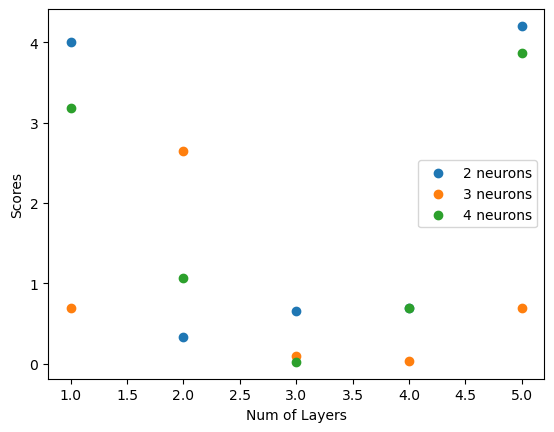

In [12]:
plt.figure()
plt.scatter(num_layers, scores_2, label='2 neurons')
plt.scatter(num_layers, scores_3, label='3 neurons')
plt.scatter(num_layers, scores_4, label='4 neurons')
plt.xlabel("Num of Layers")
plt.ylabel("Scores")
plt.legend()

In [13]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='tanh'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
#print(model.predict(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 711us/step - loss: 1.7001
Epoch 2/400
80/80 [==============================] - 0s 663us/step - loss: 0.7020
Epoch 3/400
80/80 [==============================] - 0s 659us/step - loss: 0.6921
Epoch 4/400
80/80 [==============================] - 0s 675us/step - loss: 0.6863
Epoch 5/400
80/80 [==============================] - 0s 662us/step - loss: 0.6676
Epoch 6/400
80/80 [==============================] - 0s 686us/step - loss: 0.6674
Epoch 7/400
80/80 [==============================] - 0s 680us/step - loss: 0.6454
Epoch 8/400
80/80 [==============================] - 0s 629us/step - loss: 0.6346
Epoch 9/400
80/80 [==============================] - 0s 683us/step - loss: 0.6221
Epoch 10/400
80/80 [==============================] - 0s 648us/step - loss: 0.6078
Epoch 11/400
80/80 [==============================] - 0s 664us/step - loss: 0.5879
Epoch 12/400
80/80 [==============================] - 0s 651us/step - loss: 0.5748
Epoch 13/400


80/80 [==============================] - 0s 627us/step - loss: 0.0508
Epoch 100/400
80/80 [==============================] - 0s 601us/step - loss: 0.0480
Epoch 101/400
80/80 [==============================] - 0s 572us/step - loss: 0.0526
Epoch 102/400
80/80 [==============================] - 0s 583us/step - loss: 0.0462
Epoch 103/400
80/80 [==============================] - 0s 569us/step - loss: 0.0475
Epoch 104/400
80/80 [==============================] - 0s 585us/step - loss: 0.0449
Epoch 105/400
80/80 [==============================] - 0s 587us/step - loss: 0.0625
Epoch 106/400
80/80 [==============================] - 0s 571us/step - loss: 0.0459
Epoch 107/400
80/80 [==============================] - 0s 585us/step - loss: 0.0443
Epoch 108/400
80/80 [==============================] - 0s 618us/step - loss: 0.0531
Epoch 109/400
80/80 [==============================] - 0s 631us/step - loss: 0.0459
Epoch 110/400
80/80 [==============================] - 0s 592us/step - loss: 0.0433
Epoch 

80/80 [==============================] - 0s 653us/step - loss: 0.0304
Epoch 197/400
80/80 [==============================] - 0s 644us/step - loss: 0.0357
Epoch 198/400
80/80 [==============================] - 0s 582us/step - loss: 0.0530
Epoch 199/400
80/80 [==============================] - 0s 579us/step - loss: 0.0406
Epoch 200/400
80/80 [==============================] - 0s 584us/step - loss: 0.0414
Epoch 201/400
80/80 [==============================] - 0s 566us/step - loss: 0.0345
Epoch 202/400
80/80 [==============================] - 0s 599us/step - loss: 0.0358
Epoch 203/400
80/80 [==============================] - 0s 585us/step - loss: 0.0383
Epoch 204/400
80/80 [==============================] - 0s 586us/step - loss: 0.0375
Epoch 205/400
80/80 [==============================] - 0s 578us/step - loss: 0.0386
Epoch 206/400
80/80 [==============================] - 0s 584us/step - loss: 0.0305
Epoch 207/400
80/80 [==============================] - 0s 608us/step - loss: 0.0337
Epoch 

80/80 [==============================] - 0s 644us/step - loss: 0.0335
Epoch 294/400
80/80 [==============================] - 0s 672us/step - loss: 0.0323
Epoch 295/400
80/80 [==============================] - 0s 648us/step - loss: 0.0284
Epoch 296/400
80/80 [==============================] - 0s 623us/step - loss: 0.0293
Epoch 297/400
80/80 [==============================] - 0s 586us/step - loss: 0.0322
Epoch 298/400
80/80 [==============================] - 0s 624us/step - loss: 0.0455
Epoch 299/400
80/80 [==============================] - 0s 606us/step - loss: 0.0324
Epoch 300/400
80/80 [==============================] - 0s 594us/step - loss: 0.0308
Epoch 301/400
80/80 [==============================] - 0s 609us/step - loss: 0.0326
Epoch 302/400
80/80 [==============================] - 0s 613us/step - loss: 0.0423
Epoch 303/400
80/80 [==============================] - 0s 627us/step - loss: 0.0298
Epoch 304/400
80/80 [==============================] - 0s 596us/step - loss: 0.0373
Epoch 

80/80 [==============================] - 0s 628us/step - loss: 0.0240
Epoch 391/400
80/80 [==============================] - 0s 631us/step - loss: 0.0255
Epoch 392/400
80/80 [==============================] - 0s 606us/step - loss: 0.0299
Epoch 393/400
80/80 [==============================] - 0s 652us/step - loss: 0.0320
Epoch 394/400
80/80 [==============================] - 0s 617us/step - loss: 0.0344
Epoch 395/400
80/80 [==============================] - 0s 745us/step - loss: 0.0269
Epoch 396/400
80/80 [==============================] - 0s 593us/step - loss: 0.0402
Epoch 397/400
80/80 [==============================] - 0s 614us/step - loss: 0.0901
Epoch 398/400
80/80 [==============================] - 0s 595us/step - loss: 0.0268
Epoch 399/400
80/80 [==============================] - 0s 575us/step - loss: 0.0512
Epoch 400/400
5/5 [==============================] - 0s 881us/step - loss: 0.0193


In [14]:
# relu comparison
model = Sequential()

model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
#print(model.predict(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 704us/step - loss: 8.5464
Epoch 2/400
80/80 [==============================] - 0s 684us/step - loss: 7.6246
Epoch 3/400
80/80 [==============================] - 0s 656us/step - loss: 7.6246
Epoch 4/400
80/80 [==============================] - 0s 646us/step - loss: 7.6246
Epoch 5/400
80/80 [==============================] - 0s 753us/step - loss: 7.6246
Epoch 6/400
80/80 [==============================] - 0s 645us/step - loss: 7.6246
Epoch 7/400
80/80 [==============================] - 0s 676us/step - loss: 7.6246
Epoch 8/400
80/80 [==============================] - 0s 715us/step - loss: 7.6246
Epoch 9/400
80/80 [==============================] - 0s 681us/step - loss: 7.6246
Epoch 10/400
80/80 [==============================] - 0s 687us/step - loss: 7.6246
Epoch 11/400
80/80 [==============================] - 0s 644us/step - loss: 7.6246
Epoch 12/400
80/80 [==============================] - 0s 679us/step - loss: 7.6246
Epoch 13/400


80/80 [==============================] - 0s 662us/step - loss: 7.6246
Epoch 100/400
80/80 [==============================] - 0s 669us/step - loss: 7.6246
Epoch 101/400
80/80 [==============================] - 0s 600us/step - loss: 7.6246
Epoch 102/400
80/80 [==============================] - 0s 584us/step - loss: 7.6246
Epoch 103/400
80/80 [==============================] - 0s 605us/step - loss: 7.6246
Epoch 104/400
80/80 [==============================] - 0s 589us/step - loss: 7.6246
Epoch 105/400
80/80 [==============================] - 0s 596us/step - loss: 7.6246
Epoch 106/400
80/80 [==============================] - 0s 597us/step - loss: 7.6246
Epoch 107/400
80/80 [==============================] - 0s 597us/step - loss: 7.6246
Epoch 108/400
80/80 [==============================] - 0s 592us/step - loss: 7.6246
Epoch 109/400
80/80 [==============================] - 0s 576us/step - loss: 7.6246
Epoch 110/400
80/80 [==============================] - 0s 581us/step - loss: 7.6246
Epoch 

80/80 [==============================] - 0s 670us/step - loss: 7.6246
Epoch 197/400
80/80 [==============================] - 0s 663us/step - loss: 7.6246
Epoch 198/400
80/80 [==============================] - 0s 736us/step - loss: 7.6246
Epoch 199/400
80/80 [==============================] - 0s 679us/step - loss: 7.6246
Epoch 200/400
80/80 [==============================] - 0s 683us/step - loss: 7.6246
Epoch 201/400
80/80 [==============================] - 0s 692us/step - loss: 7.6246
Epoch 202/400
80/80 [==============================] - 0s 613us/step - loss: 7.6246
Epoch 203/400
80/80 [==============================] - 0s 573us/step - loss: 7.6246
Epoch 204/400
80/80 [==============================] - 0s 575us/step - loss: 7.6246
Epoch 205/400
80/80 [==============================] - 0s 571us/step - loss: 7.6246
Epoch 206/400
80/80 [==============================] - 0s 570us/step - loss: 7.6246
Epoch 207/400
80/80 [==============================] - 0s 563us/step - loss: 7.6246
Epoch 

80/80 [==============================] - 0s 550us/step - loss: 7.6246
Epoch 294/400
80/80 [==============================] - 0s 550us/step - loss: 7.6246
Epoch 295/400
80/80 [==============================] - 0s 556us/step - loss: 7.6246
Epoch 296/400
80/80 [==============================] - 0s 552us/step - loss: 7.6246
Epoch 297/400
80/80 [==============================] - 0s 552us/step - loss: 7.6246
Epoch 298/400
80/80 [==============================] - 0s 550us/step - loss: 7.6246
Epoch 299/400
80/80 [==============================] - 0s 556us/step - loss: 7.6246
Epoch 300/400
80/80 [==============================] - 0s 548us/step - loss: 7.6246
Epoch 301/400
80/80 [==============================] - 0s 553us/step - loss: 7.6246
Epoch 302/400
80/80 [==============================] - 0s 561us/step - loss: 7.6246
Epoch 303/400
80/80 [==============================] - 0s 547us/step - loss: 7.6246
Epoch 304/400
80/80 [==============================] - 0s 558us/step - loss: 7.6246
Epoch 

80/80 [==============================] - 0s 555us/step - loss: 7.6246
Epoch 391/400
80/80 [==============================] - 0s 567us/step - loss: 7.6246
Epoch 392/400
80/80 [==============================] - 0s 549us/step - loss: 7.6246
Epoch 393/400
80/80 [==============================] - 0s 586us/step - loss: 7.6246
Epoch 394/400
80/80 [==============================] - 0s 562us/step - loss: 7.6246
Epoch 395/400
80/80 [==============================] - 0s 554us/step - loss: 7.6246
Epoch 396/400
80/80 [==============================] - 0s 550us/step - loss: 7.6246
Epoch 397/400
80/80 [==============================] - 0s 545us/step - loss: 7.6246
Epoch 398/400
80/80 [==============================] - 0s 549us/step - loss: 7.6246
Epoch 399/400
80/80 [==============================] - 0s 554us/step - loss: 7.6246
Epoch 400/400
5/5 [==============================] - 0s 822us/step - loss: 7.6246


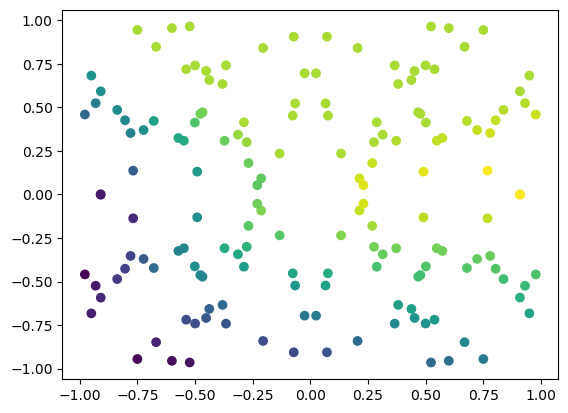

In [15]:
plt.scatter(*zip(*X), c=model.predict(X))

In [16]:
# sigmoid comparison
model = Sequential()

model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
#print(model.predict(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 753us/step - loss: 0.7007
Epoch 2/400
80/80 [==============================] - 0s 675us/step - loss: 0.6967
Epoch 3/400
80/80 [==============================] - 0s 680us/step - loss: 0.6952
Epoch 4/400
80/80 [==============================] - 0s 656us/step - loss: 0.6948
Epoch 5/400
80/80 [==============================] - 0s 671us/step - loss: 0.6944
Epoch 6/400
80/80 [==============================] - 0s 674us/step - loss: 0.6944
Epoch 7/400
80/80 [==============================] - 0s 683us/step - loss: 0.6945
Epoch 8/400
80/80 [==============================] - 0s 687us/step - loss: 0.6946
Epoch 9/400
80/80 [==============================] - 0s 671us/step - loss: 0.6942
Epoch 10/400
80/80 [==============================] - 0s 685us/step - loss: 0.6941
Epoch 11/400
80/80 [==============================] - 0s 660us/step - loss: 0.6946
Epoch 12/400
80/80 [==============================] - 0s 658us/step - loss: 0.6944
Epoch 13/400


80/80 [==============================] - 0s 633us/step - loss: 0.6942
Epoch 100/400
80/80 [==============================] - 0s 655us/step - loss: 0.6945
Epoch 101/400
80/80 [==============================] - 0s 646us/step - loss: 0.6947
Epoch 102/400
80/80 [==============================] - 0s 631us/step - loss: 0.6944
Epoch 103/400
80/80 [==============================] - 0s 632us/step - loss: 0.6946
Epoch 104/400
80/80 [==============================] - 0s 629us/step - loss: 0.6945
Epoch 105/400
80/80 [==============================] - 0s 626us/step - loss: 0.6947
Epoch 106/400
80/80 [==============================] - 0s 632us/step - loss: 0.6945
Epoch 107/400
80/80 [==============================] - 0s 646us/step - loss: 0.6947
Epoch 108/400
80/80 [==============================] - 0s 653us/step - loss: 0.6946
Epoch 109/400
80/80 [==============================] - 0s 653us/step - loss: 0.6944
Epoch 110/400
80/80 [==============================] - 0s 656us/step - loss: 0.6945
Epoch 

80/80 [==============================] - 0s 645us/step - loss: 0.6943
Epoch 197/400
80/80 [==============================] - 0s 650us/step - loss: 0.6942
Epoch 198/400
80/80 [==============================] - 0s 624us/step - loss: 0.6943
Epoch 199/400
80/80 [==============================] - 0s 626us/step - loss: 0.6945
Epoch 200/400
80/80 [==============================] - 0s 622us/step - loss: 0.6943
Epoch 201/400
80/80 [==============================] - 0s 626us/step - loss: 0.6944
Epoch 202/400
80/80 [==============================] - 0s 629us/step - loss: 0.6946
Epoch 203/400
80/80 [==============================] - 0s 632us/step - loss: 0.6945
Epoch 204/400
80/80 [==============================] - 0s 649us/step - loss: 0.6946
Epoch 205/400
80/80 [==============================] - 0s 652us/step - loss: 0.6940
Epoch 206/400
80/80 [==============================] - 0s 650us/step - loss: 0.6946
Epoch 207/400
80/80 [==============================] - 0s 653us/step - loss: 0.6944
Epoch 

80/80 [==============================] - 0s 648us/step - loss: 0.6944
Epoch 294/400
80/80 [==============================] - 0s 668us/step - loss: 0.6945
Epoch 295/400
80/80 [==============================] - 0s 629us/step - loss: 0.6943
Epoch 296/400
80/80 [==============================] - 0s 630us/step - loss: 0.6945
Epoch 297/400
80/80 [==============================] - 0s 624us/step - loss: 0.6944
Epoch 298/400
80/80 [==============================] - 0s 623us/step - loss: 0.6943
Epoch 299/400
80/80 [==============================] - 0s 632us/step - loss: 0.6945
Epoch 300/400
80/80 [==============================] - 0s 631us/step - loss: 0.6946
Epoch 301/400
80/80 [==============================] - 0s 629us/step - loss: 0.6946
Epoch 302/400
80/80 [==============================] - 0s 632us/step - loss: 0.6942
Epoch 303/400
80/80 [==============================] - 0s 631us/step - loss: 0.6943
Epoch 304/400
80/80 [==============================] - 0s 648us/step - loss: 0.6942
Epoch 

80/80 [==============================] - 0s 648us/step - loss: 0.6946
Epoch 391/400
80/80 [==============================] - 0s 647us/step - loss: 0.6944
Epoch 392/400
80/80 [==============================] - 0s 644us/step - loss: 0.6945
Epoch 393/400
80/80 [==============================] - 0s 645us/step - loss: 0.6939
Epoch 394/400
80/80 [==============================] - 0s 651us/step - loss: 0.6942
Epoch 395/400
80/80 [==============================] - 0s 631us/step - loss: 0.6941
Epoch 396/400
80/80 [==============================] - 0s 631us/step - loss: 0.6943
Epoch 397/400
80/80 [==============================] - 0s 627us/step - loss: 0.6943
Epoch 398/400
80/80 [==============================] - 0s 626us/step - loss: 0.6942
Epoch 399/400
80/80 [==============================] - 0s 630us/step - loss: 0.6945
Epoch 400/400
5/5 [==============================] - 0s 846us/step - loss: 0.6931


In [17]:
print(model.predict(X).reshape(4*n))


[0.4977923  0.49882632 0.4976428  0.49872363 0.49876535 0.4975962
 0.49837252 0.49656928 0.49875602 0.49749246 0.4985417  0.49866426
 0.4976378  0.49758667 0.498132   0.49979523 0.49894056 0.49751994
 0.4985548  0.4970694  0.49705958 0.49818152 0.49906424 0.4987017
 0.49835983 0.49846172 0.49694005 0.49727488 0.49741837 0.4981755
 0.49688312 0.4991132  0.49851522 0.4982115  0.49733198 0.4985501
 0.49935746 0.4983568  0.49868575 0.49843433 0.50010467 0.49911216
 0.50026727 0.49922118 0.49916923 0.5003164  0.4995771  0.5011535
 0.49919456 0.50040823 0.49940854 0.4992808  0.50026786 0.50028825
 0.49980322 0.49802545 0.49900895 0.50038    0.4993918  0.5007326
 0.5008004  0.4997719  0.49888235 0.4992472  0.4995921  0.49948198
 0.5008967  0.5006217  0.50048685 0.49976832 0.5009115  0.49882215
 0.4994347  0.49973384 0.5005412  0.49939814 0.4985396  0.49958864
 0.49926314 0.49951237 0.49762622 0.49720162 0.49670845 0.49720642
 0.49676588 0.49646235 0.49730036 0.4964198  0.4981856  0.49644017
 

In [18]:
scores = model.evaluate(X, y)
scores, model.metrics_names

5/5 [==============================] - 0s 857us/step - loss: 0.6931


(0.6930533647537231, ['loss'])

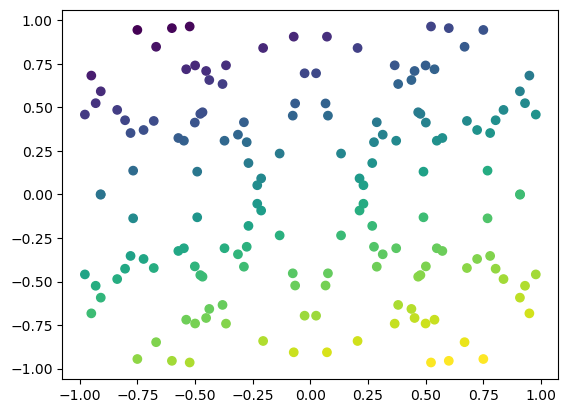

In [19]:
plt.scatter(*zip(*X), c=model.predict(X))

In [20]:
# adam comparison
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 824us/step - loss: 0.7003
Epoch 2/400
80/80 [==============================] - 0s 749us/step - loss: 0.6881
Epoch 3/400
80/80 [==============================] - 0s 752us/step - loss: 0.6757
Epoch 4/400
80/80 [==============================] - 0s 722us/step - loss: 0.6623
Epoch 5/400
80/80 [==============================] - 0s 766us/step - loss: 0.6461
Epoch 6/400
80/80 [==============================] - 0s 746us/step - loss: 0.6280
Epoch 7/400
80/80 [==============================] - 0s 736us/step - loss: 0.6093
Epoch 8/400
80/80 [==============================] - 0s 739us/step - loss: 0.5891
Epoch 9/400
80/80 [==============================] - 0s 738us/step - loss: 0.5675
Epoch 10/400
80/80 [==============================] - 0s 753us/step - loss: 0.5419
Epoch 11/400
80/80 [==============================] - 0s 737us/step - loss: 0.5113
Epoch 12/400
80/80 [==============================] - 0s 748us/step - loss: 0.4836
Epoch 13/400


80/80 [==============================] - 0s 711us/step - loss: 0.0569
Epoch 100/400
80/80 [==============================] - 0s 719us/step - loss: 0.0562
Epoch 101/400
80/80 [==============================] - 0s 709us/step - loss: 0.0552
Epoch 102/400
80/80 [==============================] - 0s 713us/step - loss: 0.0543
Epoch 103/400
80/80 [==============================] - 0s 723us/step - loss: 0.0540
Epoch 104/400
80/80 [==============================] - 0s 710us/step - loss: 0.0538
Epoch 105/400
80/80 [==============================] - 0s 719us/step - loss: 0.0533
Epoch 106/400
80/80 [==============================] - 0s 708us/step - loss: 0.0522
Epoch 107/400
80/80 [==============================] - 0s 727us/step - loss: 0.0519
Epoch 108/400
80/80 [==============================] - 0s 718us/step - loss: 0.0513
Epoch 109/400
80/80 [==============================] - 0s 719us/step - loss: 0.0504
Epoch 110/400
80/80 [==============================] - 0s 751us/step - loss: 0.0494
Epoch 

80/80 [==============================] - 0s 715us/step - loss: 0.0275
Epoch 197/400
80/80 [==============================] - 0s 719us/step - loss: 0.0279
Epoch 198/400
80/80 [==============================] - 0s 701us/step - loss: 0.0273
Epoch 199/400
80/80 [==============================] - 0s 712us/step - loss: 0.0267
Epoch 200/400
80/80 [==============================] - 0s 704us/step - loss: 0.0273
Epoch 201/400
80/80 [==============================] - 0s 705us/step - loss: 0.0272
Epoch 202/400
80/80 [==============================] - 0s 704us/step - loss: 0.0276
Epoch 203/400
80/80 [==============================] - 0s 709us/step - loss: 0.0268
Epoch 204/400
80/80 [==============================] - 0s 701us/step - loss: 0.0263
Epoch 205/400
80/80 [==============================] - 0s 721us/step - loss: 0.0267
Epoch 206/400
80/80 [==============================] - 0s 704us/step - loss: 0.0259
Epoch 207/400
80/80 [==============================] - 0s 708us/step - loss: 0.0271
Epoch 

80/80 [==============================] - 0s 705us/step - loss: 0.0219
Epoch 294/400
80/80 [==============================] - 0s 723us/step - loss: 0.0224
Epoch 295/400
80/80 [==============================] - 0s 697us/step - loss: 0.0215
Epoch 296/400
80/80 [==============================] - 0s 722us/step - loss: 0.0216
Epoch 297/400
80/80 [==============================] - 0s 721us/step - loss: 0.0220
Epoch 298/400
80/80 [==============================] - 0s 715us/step - loss: 0.0218
Epoch 299/400
80/80 [==============================] - 0s 718us/step - loss: 0.0205
Epoch 300/400
80/80 [==============================] - 0s 710us/step - loss: 0.0217
Epoch 301/400
80/80 [==============================] - 0s 712us/step - loss: 0.0214
Epoch 302/400
80/80 [==============================] - 0s 708us/step - loss: 0.0216
Epoch 303/400
80/80 [==============================] - 0s 716us/step - loss: 0.0213
Epoch 304/400
80/80 [==============================] - 0s 711us/step - loss: 0.0212
Epoch 

80/80 [==============================] - 0s 711us/step - loss: 0.0196
Epoch 391/400
80/80 [==============================] - 0s 745us/step - loss: 0.0191
Epoch 392/400
80/80 [==============================] - 0s 750us/step - loss: 0.0190
Epoch 393/400
80/80 [==============================] - 0s 712us/step - loss: 0.0194
Epoch 394/400
80/80 [==============================] - 0s 711us/step - loss: 0.0190
Epoch 395/400
80/80 [==============================] - 0s 705us/step - loss: 0.0189
Epoch 396/400
80/80 [==============================] - 0s 707us/step - loss: 0.0194
Epoch 397/400
80/80 [==============================] - 0s 701us/step - loss: 0.0191
Epoch 398/400
80/80 [==============================] - 0s 716us/step - loss: 0.0184
Epoch 399/400
80/80 [==============================] - 0s 712us/step - loss: 0.0180
Epoch 400/400
5/5 [==============================] - 0s 886us/step - loss: 0.0167


In [21]:
# rmsprop comparison
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='RMSprop')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 1s 806us/step - loss: 0.6682
Epoch 2/400
80/80 [==============================] - 0s 755us/step - loss: 0.6439
Epoch 3/400
80/80 [==============================] - 0s 732us/step - loss: 0.6188
Epoch 4/400
80/80 [==============================] - 0s 729us/step - loss: 0.5967
Epoch 5/400
80/80 [==============================] - 0s 749us/step - loss: 0.5775
Epoch 6/400
80/80 [==============================] - 0s 746us/step - loss: 0.5601
Epoch 7/400
80/80 [==============================] - 0s 714us/step - loss: 0.5432
Epoch 8/400
80/80 [==============================] - 0s 745us/step - loss: 0.5258
Epoch 9/400
80/80 [==============================] - 0s 720us/step - loss: 0.5110
Epoch 10/400
80/80 [==============================] - 0s 707us/step - loss: 0.4992
Epoch 11/400
80/80 [==============================] - 0s 726us/step - loss: 0.4868
Epoch 12/400
80/80 [==============================] - 0s 707us/step - loss: 0.4763
Epoch 13/400


80/80 [==============================] - 0s 694us/step - loss: 0.3805
Epoch 100/400
80/80 [==============================] - 0s 724us/step - loss: 0.3794
Epoch 101/400
80/80 [==============================] - 0s 685us/step - loss: 0.3806
Epoch 102/400
80/80 [==============================] - 0s 701us/step - loss: 0.3793
Epoch 103/400
80/80 [==============================] - 0s 701us/step - loss: 0.3791
Epoch 104/400
80/80 [==============================] - 0s 702us/step - loss: 0.3780
Epoch 105/400
80/80 [==============================] - 0s 688us/step - loss: 0.3789
Epoch 106/400
80/80 [==============================] - 0s 688us/step - loss: 0.3779
Epoch 107/400
80/80 [==============================] - 0s 700us/step - loss: 0.3784
Epoch 108/400
80/80 [==============================] - 0s 754us/step - loss: 0.3791
Epoch 109/400
80/80 [==============================] - 0s 690us/step - loss: 0.3777
Epoch 110/400
80/80 [==============================] - 0s 699us/step - loss: 0.3769
Epoch 

80/80 [==============================] - 0s 698us/step - loss: 0.3645
Epoch 197/400
80/80 [==============================] - 0s 714us/step - loss: 0.3649
Epoch 198/400
80/80 [==============================] - 0s 691us/step - loss: 0.3650
Epoch 199/400
80/80 [==============================] - 0s 696us/step - loss: 0.3653
Epoch 200/400
80/80 [==============================] - 0s 684us/step - loss: 0.3655
Epoch 201/400
80/80 [==============================] - 0s 697us/step - loss: 0.3651
Epoch 202/400
80/80 [==============================] - 0s 686us/step - loss: 0.3649
Epoch 203/400
80/80 [==============================] - 0s 708us/step - loss: 0.3655
Epoch 204/400
80/80 [==============================] - 0s 693us/step - loss: 0.3652
Epoch 205/400
80/80 [==============================] - 0s 703us/step - loss: 0.3655
Epoch 206/400
80/80 [==============================] - 0s 703us/step - loss: 0.3654
Epoch 207/400
80/80 [==============================] - 0s 701us/step - loss: 0.3655
Epoch 

80/80 [==============================] - 0s 702us/step - loss: 0.3619
Epoch 294/400
80/80 [==============================] - 0s 691us/step - loss: 0.3621
Epoch 295/400
80/80 [==============================] - 0s 688us/step - loss: 0.3611
Epoch 296/400
80/80 [==============================] - 0s 697us/step - loss: 0.3617
Epoch 297/400
80/80 [==============================] - 0s 710us/step - loss: 0.3609
Epoch 298/400
80/80 [==============================] - 0s 694us/step - loss: 0.3607
Epoch 299/400
80/80 [==============================] - 0s 714us/step - loss: 0.3612
Epoch 300/400
80/80 [==============================] - 0s 707us/step - loss: 0.3610
Epoch 301/400
80/80 [==============================] - 0s 695us/step - loss: 0.3604
Epoch 302/400
80/80 [==============================] - 0s 695us/step - loss: 0.3611
Epoch 303/400
80/80 [==============================] - 0s 696us/step - loss: 0.3606
Epoch 304/400
80/80 [==============================] - 0s 687us/step - loss: 0.3604
Epoch 

80/80 [==============================] - 0s 728us/step - loss: 0.3577
Epoch 391/400
80/80 [==============================] - 0s 703us/step - loss: 0.3580
Epoch 392/400
80/80 [==============================] - 0s 698us/step - loss: 0.3576
Epoch 393/400
80/80 [==============================] - 0s 697us/step - loss: 0.3585
Epoch 394/400
80/80 [==============================] - 0s 722us/step - loss: 0.3576
Epoch 395/400
80/80 [==============================] - 0s 704us/step - loss: 0.3582
Epoch 396/400
80/80 [==============================] - 0s 704us/step - loss: 0.3579
Epoch 397/400
80/80 [==============================] - 0s 709us/step - loss: 0.3581
Epoch 398/400
80/80 [==============================] - 0s 690us/step - loss: 0.3580
Epoch 399/400
80/80 [==============================] - 0s 692us/step - loss: 0.3575
Epoch 400/400
5/5 [==============================] - 0s 835us/step - loss: 0.3570


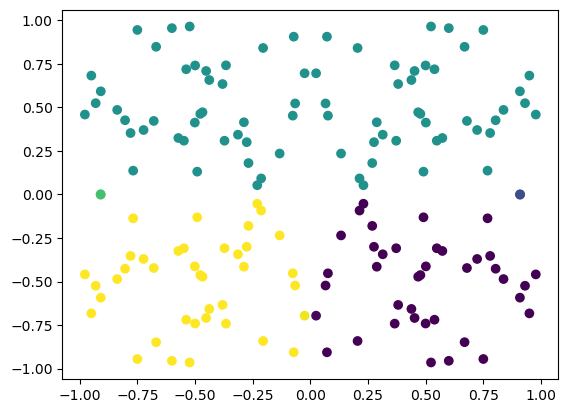

In [22]:
plt.scatter(*zip(*X), c=model.predict(X))

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [23]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [24]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [25]:
X, Y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0.,

In [26]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
77/77 [==============================] - 0s 842us/step - loss: 0.6761 - accuracy: 0.6432
Epoch 2/1000
77/77 [==============================] - 0s 838us/step - loss: 0.6295 - accuracy: 0.6549
Epoch 3/1000
77/77 [==============================] - 0s 830us/step - loss: 0.6166 - accuracy: 0.6628
Epoch 4/1000
77/77 [==============================] - 0s 775us/step - loss: 0.6054 - accuracy: 0.6667
Epoch 5/1000
77/77 [==============================] - 0s 786us/step - loss: 0.5973 - accuracy: 0.6706
Epoch 6/1000
77/77 [==============================] - 0s 808us/step - loss: 0.5998 - accuracy: 0.6693
Epoch 7/1000
77/77 [==============================] - 0s 808us/step - loss: 0.5937 - accuracy: 0.6667
Epoch 8/1000
77/77 [==============================] - 0s 789us/step - loss: 0.5929 - accuracy: 0.6784
Epoch 9/1000
77/77 [==============================] - 0s 790us/step - loss: 0.5993 - accuracy: 0.6667
Epoch 10/1000
77/77 [==============================] - 0s 785us/step - loss: 0.583

77/77 [==============================] - 0s 761us/step - loss: 0.5137 - accuracy: 0.7344
Epoch 81/1000
77/77 [==============================] - 0s 775us/step - loss: 0.5125 - accuracy: 0.7370
Epoch 82/1000
77/77 [==============================] - 0s 755us/step - loss: 0.5024 - accuracy: 0.7396
Epoch 83/1000
77/77 [==============================] - 0s 752us/step - loss: 0.5136 - accuracy: 0.7513
Epoch 84/1000
77/77 [==============================] - 0s 715us/step - loss: 0.5077 - accuracy: 0.7591
Epoch 85/1000
77/77 [==============================] - 0s 771us/step - loss: 0.5082 - accuracy: 0.7474
Epoch 86/1000
77/77 [==============================] - 0s 806us/step - loss: 0.5074 - accuracy: 0.7474
Epoch 87/1000
77/77 [==============================] - 0s 770us/step - loss: 0.5060 - accuracy: 0.7474
Epoch 88/1000
77/77 [==============================] - 0s 756us/step - loss: 0.5051 - accuracy: 0.7539
Epoch 89/1000
77/77 [==============================] - 0s 781us/step - loss: 0.5070 - a

77/77 [==============================] - 0s 702us/step - loss: 0.4796 - accuracy: 0.7539
Epoch 160/1000
77/77 [==============================] - 0s 810us/step - loss: 0.4847 - accuracy: 0.7513
Epoch 161/1000
77/77 [==============================] - 0s 773us/step - loss: 0.4798 - accuracy: 0.7617
Epoch 162/1000
77/77 [==============================] - 0s 713us/step - loss: 0.4834 - accuracy: 0.7604
Epoch 163/1000
77/77 [==============================] - 0s 765us/step - loss: 0.4866 - accuracy: 0.7539
Epoch 164/1000
77/77 [==============================] - 0s 783us/step - loss: 0.4860 - accuracy: 0.7604
Epoch 165/1000
77/77 [==============================] - 0s 732us/step - loss: 0.4859 - accuracy: 0.7643
Epoch 166/1000
77/77 [==============================] - 0s 765us/step - loss: 0.5014 - accuracy: 0.7487
Epoch 167/1000
77/77 [==============================] - 0s 709us/step - loss: 0.4757 - accuracy: 0.7565
Epoch 168/1000
77/77 [==============================] - 0s 770us/step - loss: 0

77/77 [==============================] - 0s 771us/step - loss: 0.4569 - accuracy: 0.7760
Epoch 238/1000
77/77 [==============================] - 0s 784us/step - loss: 0.4636 - accuracy: 0.7760
Epoch 239/1000
77/77 [==============================] - 0s 772us/step - loss: 0.4583 - accuracy: 0.7760
Epoch 240/1000
77/77 [==============================] - 0s 779us/step - loss: 0.4599 - accuracy: 0.7839
Epoch 241/1000
77/77 [==============================] - 0s 733us/step - loss: 0.4852 - accuracy: 0.7630
Epoch 242/1000
77/77 [==============================] - 0s 732us/step - loss: 0.4675 - accuracy: 0.7721
Epoch 243/1000
77/77 [==============================] - 0s 799us/step - loss: 0.4520 - accuracy: 0.7878
Epoch 244/1000
77/77 [==============================] - 0s 798us/step - loss: 0.4540 - accuracy: 0.7852
Epoch 245/1000
77/77 [==============================] - 0s 769us/step - loss: 0.4642 - accuracy: 0.7826
Epoch 246/1000
77/77 [==============================] - 0s 767us/step - loss: 0

77/77 [==============================] - 0s 742us/step - loss: 0.4476 - accuracy: 0.7799
Epoch 316/1000
77/77 [==============================] - 0s 775us/step - loss: 0.4467 - accuracy: 0.7747
Epoch 317/1000
77/77 [==============================] - 0s 778us/step - loss: 0.4454 - accuracy: 0.7865
Epoch 318/1000
77/77 [==============================] - 0s 786us/step - loss: 0.4453 - accuracy: 0.7773
Epoch 319/1000
77/77 [==============================] - 0s 739us/step - loss: 0.4546 - accuracy: 0.7773
Epoch 320/1000
77/77 [==============================] - 0s 712us/step - loss: 0.4456 - accuracy: 0.7826
Epoch 321/1000
77/77 [==============================] - 0s 748us/step - loss: 0.4377 - accuracy: 0.7865
Epoch 322/1000
77/77 [==============================] - 0s 720us/step - loss: 0.4333 - accuracy: 0.7865
Epoch 323/1000
77/77 [==============================] - 0s 758us/step - loss: 0.4412 - accuracy: 0.7721
Epoch 324/1000
77/77 [==============================] - 0s 762us/step - loss: 0

77/77 [==============================] - 0s 758us/step - loss: 0.4269 - accuracy: 0.7865
Epoch 394/1000
77/77 [==============================] - 0s 790us/step - loss: 0.4256 - accuracy: 0.7852
Epoch 395/1000
77/77 [==============================] - 0s 739us/step - loss: 0.4270 - accuracy: 0.7852
Epoch 396/1000
77/77 [==============================] - 0s 738us/step - loss: 0.4327 - accuracy: 0.7852
Epoch 397/1000
77/77 [==============================] - 0s 723us/step - loss: 0.4202 - accuracy: 0.8008
Epoch 398/1000
77/77 [==============================] - 0s 713us/step - loss: 0.4340 - accuracy: 0.7773
Epoch 399/1000
77/77 [==============================] - 0s 712us/step - loss: 0.4360 - accuracy: 0.7799
Epoch 400/1000
77/77 [==============================] - 0s 783us/step - loss: 0.4276 - accuracy: 0.7826
Epoch 401/1000
77/77 [==============================] - 0s 773us/step - loss: 0.4352 - accuracy: 0.7760
Epoch 402/1000
77/77 [==============================] - 0s 758us/step - loss: 0

77/77 [==============================] - 0s 733us/step - loss: 0.4255 - accuracy: 0.7786
Epoch 472/1000
77/77 [==============================] - 0s 778us/step - loss: 0.4359 - accuracy: 0.7904
Epoch 473/1000
77/77 [==============================] - 0s 764us/step - loss: 0.4266 - accuracy: 0.7799
Epoch 474/1000
77/77 [==============================] - 0s 721us/step - loss: 0.4215 - accuracy: 0.7969
Epoch 475/1000
77/77 [==============================] - 0s 711us/step - loss: 0.4148 - accuracy: 0.7943
Epoch 476/1000
77/77 [==============================] - 0s 760us/step - loss: 0.4155 - accuracy: 0.7943
Epoch 477/1000
77/77 [==============================] - 0s 774us/step - loss: 0.4290 - accuracy: 0.7891
Epoch 478/1000
77/77 [==============================] - 0s 805us/step - loss: 0.4213 - accuracy: 0.7904
Epoch 479/1000
77/77 [==============================] - 0s 796us/step - loss: 0.4388 - accuracy: 0.7969
Epoch 480/1000
77/77 [==============================] - 0s 815us/step - loss: 0

77/77 [==============================] - 0s 814us/step - loss: 0.4200 - accuracy: 0.7982
Epoch 550/1000
77/77 [==============================] - 0s 803us/step - loss: 0.4157 - accuracy: 0.7734
Epoch 551/1000
77/77 [==============================] - 0s 769us/step - loss: 0.4405 - accuracy: 0.7760
Epoch 552/1000
77/77 [==============================] - 0s 723us/step - loss: 0.4162 - accuracy: 0.7982
Epoch 553/1000
77/77 [==============================] - 0s 781us/step - loss: 0.4221 - accuracy: 0.7891
Epoch 554/1000
77/77 [==============================] - 0s 760us/step - loss: 0.4292 - accuracy: 0.7891
Epoch 555/1000
77/77 [==============================] - 0s 826us/step - loss: 0.4076 - accuracy: 0.7891
Epoch 556/1000
77/77 [==============================] - 0s 775us/step - loss: 0.4131 - accuracy: 0.7904
Epoch 557/1000
77/77 [==============================] - 0s 764us/step - loss: 0.4182 - accuracy: 0.8060
Epoch 558/1000
77/77 [==============================] - 0s 714us/step - loss: 0

77/77 [==============================] - 0s 781us/step - loss: 0.3976 - accuracy: 0.8086
Epoch 628/1000
77/77 [==============================] - 0s 766us/step - loss: 0.4076 - accuracy: 0.8047
Epoch 629/1000
77/77 [==============================] - 0s 709us/step - loss: 0.3876 - accuracy: 0.8060
Epoch 630/1000
77/77 [==============================] - 0s 800us/step - loss: 0.4087 - accuracy: 0.8073
Epoch 631/1000
77/77 [==============================] - 0s 773us/step - loss: 0.4021 - accuracy: 0.8060
Epoch 632/1000
77/77 [==============================] - 0s 762us/step - loss: 0.4218 - accuracy: 0.7891
Epoch 633/1000
77/77 [==============================] - 0s 711us/step - loss: 0.4326 - accuracy: 0.7799
Epoch 634/1000
77/77 [==============================] - 0s 742us/step - loss: 0.4009 - accuracy: 0.8073
Epoch 635/1000
77/77 [==============================] - 0s 715us/step - loss: 0.4026 - accuracy: 0.8060
Epoch 636/1000
77/77 [==============================] - 0s 784us/step - loss: 0

77/77 [==============================] - 0s 771us/step - loss: 0.4065 - accuracy: 0.7956
Epoch 706/1000
77/77 [==============================] - 0s 778us/step - loss: 0.4059 - accuracy: 0.7995
Epoch 707/1000
77/77 [==============================] - 0s 725us/step - loss: 0.4090 - accuracy: 0.7956
Epoch 708/1000
77/77 [==============================] - 0s 755us/step - loss: 0.4157 - accuracy: 0.8008
Epoch 709/1000
77/77 [==============================] - 0s 743us/step - loss: 0.4128 - accuracy: 0.8034
Epoch 710/1000
77/77 [==============================] - 0s 808us/step - loss: 0.4051 - accuracy: 0.8099
Epoch 711/1000
77/77 [==============================] - 0s 741us/step - loss: 0.4077 - accuracy: 0.8034
Epoch 712/1000
77/77 [==============================] - 0s 716us/step - loss: 0.3983 - accuracy: 0.8021
Epoch 713/1000
77/77 [==============================] - 0s 737us/step - loss: 0.3904 - accuracy: 0.7943
Epoch 714/1000
77/77 [==============================] - 0s 770us/step - loss: 0

77/77 [==============================] - 0s 715us/step - loss: 0.3934 - accuracy: 0.8073
Epoch 784/1000
77/77 [==============================] - 0s 794us/step - loss: 0.3895 - accuracy: 0.8034
Epoch 785/1000
77/77 [==============================] - 0s 765us/step - loss: 0.3827 - accuracy: 0.8151
Epoch 786/1000
77/77 [==============================] - 0s 775us/step - loss: 0.3843 - accuracy: 0.8229
Epoch 787/1000
77/77 [==============================] - 0s 745us/step - loss: 0.3734 - accuracy: 0.8164
Epoch 788/1000
77/77 [==============================] - 0s 706us/step - loss: 0.3868 - accuracy: 0.8099
Epoch 789/1000
77/77 [==============================] - 0s 764us/step - loss: 0.3771 - accuracy: 0.8151
Epoch 790/1000
77/77 [==============================] - 0s 799us/step - loss: 0.3752 - accuracy: 0.8151
Epoch 791/1000
77/77 [==============================] - 0s 738us/step - loss: 0.3944 - accuracy: 0.8073
Epoch 792/1000
77/77 [==============================] - 0s 734us/step - loss: 0

77/77 [==============================] - 0s 768us/step - loss: 0.4045 - accuracy: 0.7917
Epoch 862/1000
77/77 [==============================] - 0s 713us/step - loss: 0.4054 - accuracy: 0.7891
Epoch 863/1000
77/77 [==============================] - 0s 723us/step - loss: 0.4128 - accuracy: 0.7943
Epoch 864/1000
77/77 [==============================] - 0s 746us/step - loss: 0.4042 - accuracy: 0.8008
Epoch 865/1000
77/77 [==============================] - 0s 728us/step - loss: 0.3939 - accuracy: 0.8021
Epoch 866/1000
77/77 [==============================] - 0s 715us/step - loss: 0.3966 - accuracy: 0.8034
Epoch 867/1000
77/77 [==============================] - 0s 712us/step - loss: 0.4091 - accuracy: 0.7982
Epoch 868/1000
77/77 [==============================] - 0s 784us/step - loss: 0.3999 - accuracy: 0.8060
Epoch 869/1000
77/77 [==============================] - 0s 779us/step - loss: 0.3966 - accuracy: 0.8099
Epoch 870/1000
77/77 [==============================] - 0s 772us/step - loss: 0

77/77 [==============================] - 0s 711us/step - loss: 0.3833 - accuracy: 0.8151
Epoch 940/1000
77/77 [==============================] - 0s 799us/step - loss: 0.3914 - accuracy: 0.7956
Epoch 941/1000
77/77 [==============================] - 0s 771us/step - loss: 0.3710 - accuracy: 0.8190
Epoch 942/1000
77/77 [==============================] - 0s 761us/step - loss: 0.3661 - accuracy: 0.8255
Epoch 943/1000
77/77 [==============================] - 0s 780us/step - loss: 0.3754 - accuracy: 0.8073
Epoch 944/1000
77/77 [==============================] - 0s 750us/step - loss: 0.3805 - accuracy: 0.8177
Epoch 945/1000
77/77 [==============================] - 0s 714us/step - loss: 0.3718 - accuracy: 0.8216
Epoch 946/1000
77/77 [==============================] - 0s 745us/step - loss: 0.3717 - accuracy: 0.8255
Epoch 947/1000
77/77 [==============================] - 0s 715us/step - loss: 0.3732 - accuracy: 0.8138
Epoch 948/1000
77/77 [==============================] - 0s 746us/step - loss: 0

In [27]:
scores = model.evaluate(X, Y)
scores, model.metrics_names

24/24 [==============================] - 0s 688us/step - loss: 0.3841 - accuracy: 0.8203


([0.38405176997184753, 0.8203125], ['loss', 'accuracy'])

In [28]:
print(model.predict(X))

[[6.00913048e-01]
 [2.52083242e-02]
 [9.74543452e-01]
 [1.11680478e-01]
 [6.42308176e-01]
 [4.64568138e-02]
 [3.78234029e-01]
 [3.92463773e-01]
 [7.37599671e-01]
 [4.61595237e-01]
 [2.53132284e-01]
 [9.72659528e-01]
 [6.90394640e-03]
 [9.87788558e-01]
 [6.42308176e-01]
 [9.76546884e-01]
 [9.89922643e-01]
 [2.64266253e-01]
 [7.31278956e-02]
 [3.16932946e-01]
 [3.65203649e-01]
 [2.50133216e-01]
 [8.05464625e-01]
 [5.28854072e-01]
 [3.35479736e-01]
 [6.71391606e-01]
 [8.06152582e-01]
 [3.46833766e-02]
 [6.91007972e-02]
 [2.62752652e-01]
 [4.54508007e-01]
 [9.79968250e-01]
 [7.44074583e-04]
 [2.56571233e-01]
 [6.17399812e-01]
 [6.37799025e-01]
 [9.06215906e-01]
 [9.88911033e-01]
 [5.51913440e-01]
 [5.70278347e-01]
 [1.72633529e-02]
 [2.69751459e-01]
 [1.12542927e-01]
 [6.64920449e-01]
 [8.05865049e-01]
 [9.77290869e-01]
 [8.05885255e-01]
 [4.19110060e-04]
 [5.56185186e-01]
 [1.82607770e-03]
 [7.43806362e-04]
 [3.16351652e-01]
 [1.53837442e-01]
 [6.42308176e-01]
 [2.42174894e-01]
 [8.292511

In [29]:
#plt.scatter(*zip(*X), c=model.predict(X))
#plt.scatter(*zip(*X))
list(zip(*X))

[(6.0,
  1.0,
  8.0,
  1.0,
  0.0,
  5.0,
  3.0,
  10.0,
  2.0,
  8.0,
  4.0,
  10.0,
  10.0,
  1.0,
  5.0,
  7.0,
  0.0,
  7.0,
  1.0,
  1.0,
  3.0,
  8.0,
  7.0,
  9.0,
  11.0,
  10.0,
  7.0,
  1.0,
  13.0,
  5.0,
  5.0,
  3.0,
  3.0,
  6.0,
  10.0,
  4.0,
  11.0,
  9.0,
  2.0,
  4.0,
  3.0,
  7.0,
  7.0,
  9.0,
  7.0,
  0.0,
  1.0,
  2.0,
  7.0,
  7.0,
  1.0,
  1.0,
  5.0,
  8.0,
  7.0,
  1.0,
  7.0,
  0.0,
  0.0,
  0.0,
  2.0,
  8.0,
  5.0,
  2.0,
  7.0,
  5.0,
  0.0,
  2.0,
  1.0,
  4.0,
  2.0,
  5.0,
  13.0,
  4.0,
  1.0,
  1.0,
  7.0,
  5.0,
  0.0,
  2.0,
  3.0,
  2.0,
  7.0,
  0.0,
  5.0,
  2.0,
  13.0,
  2.0,
  15.0,
  1.0,
  1.0,
  4.0,
  7.0,
  4.0,
  2.0,
  6.0,
  2.0,
  1.0,
  6.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  2.0,
  1.0,
  1.0,
  4.0,
  3.0,
  0.0,
  3.0,
  8.0,
  1.0,
  4.0,
  7.0,
  4.0,
  5.0,
  5.0,
  4.0,
  4.0,
  0.0,
  6.0,
  2.0,
  5.0,
  0.0,
  1.0,
  3.0,
  1.0,
  1.0,
  0.0,
  4.0,
  9.0,
  3.0,
  8.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  5.0,
  3.0,
  

In [30]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [31]:
import pandas as pd

beans = pd.read_excel('Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx')

beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [32]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder(sparse = False)

In [33]:
enc.fit(beans[["Class"]])
enc.categories_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
       dtype=object)]

In [34]:
y = enc.fit_transform(beans[["Class"]])
y

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [37]:
x = preprocessing.StandardScaler().fit_transform(beans.drop(['Class'], axis = 1))
x

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)
#beans.shape, train.shape, test.shape
x_train

array([[-0.16046385,  0.18960797,  0.74191759, ..., -1.44380004,
        -2.27843226,  0.67999998],
       [-0.09447474,  0.12887953,  0.48799531, ..., -1.10046477,
        -1.56548678, -1.13181319],
       [-0.32033825, -0.43514404, -0.70665668, ...,  1.30852819,
         1.83106171,  0.94191871],
       ...,
       [-0.64755559, -0.9013245 , -1.16352296, ...,  2.45652854,
         2.5138521 ,  0.95198236],
       [-0.47492671, -0.67033898, -0.91607438, ...,  1.77349309,
         2.11611477,  0.77423579],
       [ 1.08879362,  1.50696189,  1.26371968, ..., -1.06635481,
        -0.54702293,  0.74907011]])

In [39]:
x_train.shape

(10208, 16)

In [40]:
# create model
model = Sequential()
model.add(Dense(32*4, input_dim=16, activation='relu'))
model.add(Dense(32*4, activation='relu'))
model.add(Dense(32*4*2, activation='relu'))
model.add(Dense(32*4*4, activation='relu'))
model.add(Dense(32*4*4, activation='relu'))
model.add(Dense(32*4, activation='relu'))
model.add(Dense(7, activation='softmax'))
# Compile model
sgd = SGD(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, epochs=500, batch_size=75)
# evaluate the model
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/500
137/137 [==============================] - 1s 3ms/step - loss: 1.9514 - accuracy: 0.1153
Epoch 2/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9443 - accuracy: 0.1234
Epoch 3/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9374 - accuracy: 0.1294
Epoch 4/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9307 - accuracy: 0.1331
Epoch 5/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9242 - accuracy: 0.1357
Epoch 6/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9179 - accuracy: 0.1391
Epoch 7/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9118 - accuracy: 0.1431
Epoch 8/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9058 - accuracy: 0.1592
Epoch 9/500
137/137 [==============================] - 0s 3ms/step - loss: 1.9000 - accuracy: 0.1894
Epoch 10/500
137/137 [==============================] - 0s 3ms/step - loss: 1.8942 - accura

137/137 [==============================] - 0s 3ms/step - loss: 1.4387 - accuracy: 0.6129
Epoch 82/500
137/137 [==============================] - 0s 3ms/step - loss: 1.4294 - accuracy: 0.6151
Epoch 83/500
137/137 [==============================] - 0s 3ms/step - loss: 1.4201 - accuracy: 0.6160
Epoch 84/500
137/137 [==============================] - 0s 3ms/step - loss: 1.4108 - accuracy: 0.6174
Epoch 85/500
137/137 [==============================] - 0s 3ms/step - loss: 1.4014 - accuracy: 0.6182
Epoch 86/500
137/137 [==============================] - 0s 3ms/step - loss: 1.3920 - accuracy: 0.6199
Epoch 87/500
137/137 [==============================] - 0s 3ms/step - loss: 1.3825 - accuracy: 0.6208
Epoch 88/500
137/137 [==============================] - 0s 3ms/step - loss: 1.3730 - accuracy: 0.6215
Epoch 89/500
137/137 [==============================] - 0s 3ms/step - loss: 1.3635 - accuracy: 0.6232
Epoch 90/500
137/137 [==============================] - 0s 3ms/step - loss: 1.3540 - accuracy: 

137/137 [==============================] - 0s 3ms/step - loss: 0.8349 - accuracy: 0.7291
Epoch 161/500
137/137 [==============================] - 0s 3ms/step - loss: 0.8297 - accuracy: 0.7310
Epoch 162/500
137/137 [==============================] - 0s 3ms/step - loss: 0.8246 - accuracy: 0.7333
Epoch 163/500
137/137 [==============================] - 0s 3ms/step - loss: 0.8195 - accuracy: 0.7348
Epoch 164/500
137/137 [==============================] - 0s 3ms/step - loss: 0.8144 - accuracy: 0.7367
Epoch 165/500
137/137 [==============================] - 0s 3ms/step - loss: 0.8094 - accuracy: 0.7384
Epoch 166/500
137/137 [==============================] - 0s 3ms/step - loss: 0.8044 - accuracy: 0.7411
Epoch 167/500
137/137 [==============================] - 0s 3ms/step - loss: 0.7995 - accuracy: 0.7432
Epoch 168/500
137/137 [==============================] - 0s 3ms/step - loss: 0.7946 - accuracy: 0.7452
Epoch 169/500
137/137 [==============================] - 0s 3ms/step - loss: 0.7897 - a

137/137 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.8574
Epoch 240/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.8580
Epoch 241/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.8582
Epoch 242/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.8594
Epoch 243/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.8598
Epoch 244/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.8600
Epoch 245/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.8608
Epoch 246/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.8618
Epoch 247/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.8621
Epoch 248/500
137/137 [==============================] - 0s 3ms/step - loss: 0.5176 - a

137/137 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8914
Epoch 319/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8920
Epoch 320/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8918
Epoch 321/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8922
Epoch 322/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8925
Epoch 323/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8926
Epoch 324/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8928
Epoch 325/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8931
Epoch 326/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8932
Epoch 327/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3841 - a

137/137 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.9035
Epoch 398/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3224 - accuracy: 0.9041
Epoch 399/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3218 - accuracy: 0.9038
Epoch 400/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.9039
Epoch 401/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.9042
Epoch 402/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.9042
Epoch 403/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.9043
Epoch 404/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.9047
Epoch 405/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.9045
Epoch 406/500
137/137 [==============================] - 0s 3ms/step - loss: 0.3175 - a

137/137 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.9086
Epoch 477/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.9087
Epoch 478/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.9086
Epoch 479/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.9090
Epoch 480/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.9088
Epoch 481/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.9091
Epoch 482/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.9093
Epoch 483/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.9091
Epoch 484/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2818 - accuracy: 0.9094
Epoch 485/500
137/137 [==============================] - 0s 3ms/step - loss: 0.2815 - a

In [41]:
model.predict(x_train)

array([[2.0989815e-05, 1.4930310e-09, 6.8191739e-06, ..., 9.9823415e-01,
        6.1378152e-08, 1.7376345e-03],
       [1.5321679e-03, 6.1044661e-06, 2.1603652e-03, ..., 9.5996135e-01,
        3.1019728e-05, 3.6222715e-02],
       [1.1129740e-03, 9.5645337e-05, 5.1572365e-06, ..., 1.5958047e-05,
        9.9715269e-01, 1.1865281e-03],
       ...,
       [8.5209740e-06, 6.8891751e-07, 8.2414973e-09, ..., 6.2024220e-08,
        9.9989355e-01, 3.6236128e-05],
       [1.1960589e-04, 1.0910860e-05, 3.0854500e-07, ..., 1.3035688e-06,
        9.9943334e-01, 2.5588687e-04],
       [9.5249474e-01, 6.4030094e-03, 4.0540095e-02, ..., 3.8620483e-04,
        7.5502176e-05, 1.0013752e-04]], dtype=float32)

In [63]:
#random forest approach
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy')

In [64]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [65]:
predictions = model.predict(x_train)

In [66]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [67]:
accuracy_score(y_train, predictions)

1.0

In [68]:
confusion_matrix(y_train.argmax(axis=1), predictions.argmax(axis=1))

array([[ 977,    0,    0,    0,    0,    0,    0],
       [   0,  398,    0,    0,    0,    0,    0],
       [   0,    0, 1217,    0,    0,    0,    0],
       [   0,    0,    0, 2676,    0,    0,    0],
       [   0,    0,    0,    0, 1426,    0,    0],
       [   0,    0,    0,    0,    0, 1534,    0],
       [   0,    0,    0,    0,    0,    0, 1980]])

In [69]:
print(classification_report(y_train.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00      1217
           3       1.00      1.00      1.00      2676
           4       1.00      1.00      1.00      1426
           5       1.00      1.00      1.00      1534
           6       1.00      1.00      1.00      1980

    accuracy                           1.00     10208
   macro avg       1.00      1.00      1.00     10208
weighted avg       1.00      1.00      1.00     10208



In [70]:
test_predictions = model.predict(x_test)

In [71]:
accuracy_score(y_test, test_predictions)

0.9133117837202468

In [72]:
confusion_matrix(y_test.argmax(axis=1), test_predictions.argmax(axis=1))

array([[321,   0,  15,   0,   2,   0,   7],
       [  0, 124,   0,   0,   0,   0,   0],
       [ 22,   0, 382,   0,   5,   0,   4],
       [ 15,   0,   0, 803,   0,  11,  41],
       [ 10,   0,   4,   3, 477,   0,   8],
       [ 13,   0,   0,  16,   0, 451,  13],
       [ 18,   0,   0,  68,  10,   3, 557]])

In [73]:
print(classification_report(y_test.argmax(axis=1), test_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       345
           1       1.00      1.00      1.00       124
           2       0.95      0.92      0.94       413
           3       0.90      0.92      0.91       870
           4       0.97      0.95      0.96       502
           5       0.97      0.91      0.94       493
           6       0.88      0.85      0.87       656

    accuracy                           0.92      3403
   macro avg       0.93      0.93      0.93      3403
weighted avg       0.92      0.92      0.92      3403

